In [ ]:
###########################################################
##### TRAFFIC ACCIDENT SEVERITY PREDICTION USING LIME #####
###########################################################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import datetime # For date manipulation
import calendar # For calendar-related functions
import folium # For interactive maps
from folium.plugins import HeatMap # For heatmaps
from pandas.plotting import parallel_coordinates # For Parallel Coordinates

Data Pre-processing & Organising Stats19 Data

In [ ]:
import pandas as pd

def decode_dataframes(df_collision, df_vehicle, df_casualty):
    """
    Decodes all applicable categorical features in the STATS19 collision,
    vehicle, and casualty dataframes based on official documentation.

    Args:
        df_collision (pd.DataFrame): The raw collision dataframe.
        df_vehicle (pd.DataFrame): The raw vehicle dataframe.
        df_casualty (pd.DataFrame): The raw casualty dataframe.

    Returns:
        tuple: A tuple containing the three decoded dataframes
               (decoded_collision, decoded_vehicle, decoded_casualty).
    """

    # --- Collision Data Mappings (37 features total) ---
    # Note: Features like IDs, coordinates, dates, times, and numerical counts
    # are not mapped as they are not categorical codes.
    collision_mappings = {
        'accident_severity': {1: 'Fatal', 2: 'Serious', 3: 'Slight'},
        'day_of_week': {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'},
        'first_road_class': {1: 'Motorway', 2: 'A(M)', 3: 'A', 4: 'B', 5: 'C', 6: 'Unclassified'},
        'road_type': {1: 'Roundabout', 2: 'One way street', 3: 'Dual carriagway', 6: 'Single carriageway', 7: 'Slip road', 9: 'Unknown', 12: 'One way street/Slip road', -1: 'Data missing or out of range'},
        'junction_detail': {0: 'Not at junction or within 20 metres', 1: 'Roundabout', 2: 'Mini-roundabout', 3: 'T or staggered junction', 5: 'Slip road', 6: 'Crossroads', 7: 'More than 4 arms (not roundabout)', 8: 'Private drive or entrance', 9: 'Other junction', -1: 'Data missing or out of range'},
        'junction_control': {0: 'Not at junction or within 20 metres', 1: 'Authorised person', 2: 'Auto traffic signal', 3: 'Stop sign', 4: 'Give way or uncontrolled', -1: 'Data missing or out of range'},
        'second_road_class': {0: 'Not at junction or within 20 metres', 1: 'Motorway', 2: 'A(M)', 3: 'A', 4: 'B', 5: 'C', 6: 'Unclassified', -1: 'Data missing or out of range'},
        'pedestrian_crossing_human_control': {0: 'None within 50 metres', 1: 'Control by school crossing patrol', 2: 'Control by other authorised person', -1: 'Data missing or out of range'},
        'pedestrian_crossing_physical_facilities': {0: 'No physical crossing facilities within 50 metres', 1: 'Zebra', 4: 'Pelican, puffin, toucan or similar non-junction pedestrian signal', 5: 'Pedestrian phase at traffic signal junction', 7: 'Footbridge or subway', 8: 'Central refuge', -1: 'Data missing or out of range'},
        'light_conditions': {1: 'Daylight', 4: 'Darkness - lights lit', 5: 'Darkness - lights unlit', 6: 'Darkness - no lighting', 7: 'Darkness - lighting unknown', -1: 'Data missing or out of range'},
        'weather_conditions': {1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5: 'Raining + high winds', 6: 'Snowing + high winds', 7: 'Fog or mist', 8: 'Other', 9: 'Unknown', -1: 'Data missing or out of range'},
        'road_surface_conditions': {1: 'Dry', 2: 'Wet or damp', 3: 'Snow', 4: 'Frost or ice', 5: 'Flood over 3cm. deep', 6: 'Oil or diesel', 7: 'Mud', -1: 'Data missing or out of range'},
        'special_conditions_at_site': {0: 'None', 1: 'Auto traffic signal - out', 2: 'Auto signal part defective', 3: 'Road sign or marking defective or obscured', 4: 'Roadworks', 5: 'Road surface defective', 6: 'Oil or diesel', 7: 'Mud', -1: 'Data missing or out of range'},
        'carriageway_hazards': {0: 'None', 1: 'Vehicle load on road', 2: 'Other object on road', 3: 'Previous accident', 4: 'Dog on road', 5: 'Other animal on road', 6: 'Pedestrian in carriageway - not injured', 7: 'Any animal in carriageway (except ridden horse)', -1: 'Data missing or out of range'},
        'urban_or_rural_area': {1: 'Urban', 2: 'Rural', 3: 'Unallocated'},
        'did_police_officer_attend_scene_of_accident': {1: 'Yes', 2: 'No', 3: 'No - accident was reported using a self completion form', -1: 'Data missing or out of range'},
        'trunk_road_flag': {1: 'Trunk (Highways Agency)', 2: 'Non-trunk', -1: 'Data missing or out of range'},
        'enhanced_severity_collision': {1: 'Fatal Collision', 3: 'Slight Collision', 5: 'Serious Collision (Sub-type A)',6: 'Serious Collision (Sub-type B)', 7: 'Serious Collision (Sub-type C)'}
    }

    # --- Vehicle Data Mappings (34 features total) ---
    vehicle_mappings = {
        'vehicle_type': {1: 'Pedal cycle', 2: 'Moped or scooter (under 50cc)', 3: 'Motorcycle (50cc and under)', 4: 'Motorcycle (51-125cc)', 5: 'Motorcycle (125-500cc)', 8: 'Taxi/Private hire car', 9: 'Car', 10: 'Minibus (8-16 passenger seats)', 11: 'Bus or coach (17 or more pass seats)', 16: 'Ridden horse', 17: 'Agricultural vehicle', 18: 'Tram', 19: 'Van / Goods vehicle 3.5 tonnes mgw or under', 20: 'Goods vehicle over 3.5t. and under 7.5t', 21: 'Goods vehicle 7.5 tonnes mgw and over', 22: 'Mobility scooter', 23: 'Electric motorcycle', 90: 'Other vehicle', 97: 'Motorcycle - unknown cc', 98: 'Goods vehicle - unknown weight', -1: 'Data missing or out of range'},
        'towing_and_articulation': {0: 'No tow/articulation', 1: 'Articulated vehicle', 2: 'Double or multiple trailer', 3: 'Towed vehicle', 4: 'Caravan', 5: 'Other tow', -1: 'Data missing or out of range'},
        'vehicle_manoeuvre': {1: 'Reversing', 2: 'Parked', 3: 'Waiting to go - held up', 4: 'Stopping', 5: 'Starting', 6: 'U-turn', 7: 'Turning left', 8: 'Waiting to turn left', 9: 'Turning right', 10: 'Waiting to turn right', 11: 'Changing lane to left', 12: 'Changing lane to right', 13: 'Overtaking moving vehicle – offside', 14: 'Overtaking static vehicle - offside', 15: 'Overtaking - nearside', 16: 'Going ahead left-hand bend', 17: 'Going ahead right-hand bend', 18: 'Going ahead other', -1: 'Data missing or out of range'},
        'vehicle_direction_from': {1: 'North', 2: 'North-east', 3: 'East', 4: 'South-east', 5: 'South', 6: 'South-west', 7: 'West', 8: 'North-west', 0: 'Parked', -1: 'Data missing or out of range'},
        'vehicle_direction_to': {1: 'North', 2: 'North-east', 3: 'East', 4: 'South-east', 5: 'South', 6: 'South-west', 7: 'West', 8: 'North-west', 0: 'Parked', -1: 'Data missing or out of range'},
        'vehicle_location_restricted_lane': {0: 'On main carriageway - not in restricted lane', 1: 'Tram/Light rail track', 2: 'Bus lane', 3: 'Busway (including guided busway)', 4: 'Cycle lane (on main carriageway)', 5: 'Cycleway or shared use footway (not part of main carriageway)', 6: 'On lay-by or hard shoulder', 7: 'Entering lay-by or hard shoulder', 8: 'Leaving lay-by or hard shoulder', 9: 'Footway', 10: 'Not on carriageway', -1: 'Data missing or out of range'},
        'junction_location': {0: 'Not at or within 20 metres of junction', 1: 'Approaching junction or waiting/parked at junction approach', 2: 'Cleared junction or waiting/parked at junction exit', 3: 'Leaving roundabout', 4: 'Entering roundabout', 5: 'Leaving main road', 6: 'Entering main road', 7: 'Entering from slip road', 8: 'Mid Junction - on roundabout or main road', -1: 'Data missing or out of range'},
        'skidding_and_overturning': {0: 'None', 1: 'Skidded', 2: 'Skidded and overturned', 3: 'Jack-knifed', 4: 'Jack-knifed and overturned', 5: 'Overturned', -1: 'Data missing or out of range'},
        'hit_object_in_carriageway': {0: 'None', 1: 'Previous accident', 2: 'Animal (except ridden horse)', 4: 'Parked vehicle', 5: 'Bridge (roof)', 6: 'Bridge (side)', 7: 'Bollard or refuge', 8: 'Open door of vehicle', 9: 'Central island of roundabout', 10: 'Kerb', 11: 'Other object', 12: 'Post or column', -1: 'Data missing or out of range'},
        'vehicle_leaving_carriageway': {0: 'Did not leave carriageway', 1: 'Nearside', 2: 'Nearside and rebounded', 3: 'Straight ahead at junction', 4: 'Offside on to central reservation', 5: 'Offside on to central reservation and rebounded', 6: 'Offside - crossed central reservation', 7: 'Offside', 8: 'Offside and rebounded', -1: 'Data missing or out of range'},
        'hit_object_off_carriageway': {0: 'None', 1: 'Road sign or traffic signal', 2: 'Lamp post', 3: 'Telegraph or electricity pole', 4: 'Tree', 5: 'Bus stop or bus shelter', 6: 'Central crash barrier', 7: 'Nearside or offside crash barrier', 8: 'Submerged in water', 9: 'Entered ditch', 10: 'Other permanent object', 11: 'Wall or fence', -1: 'Data missing or out of range'},
        'first_point_of_impact': {0: 'Did not impact', 1: 'Front', 2: 'Back', 3: 'Offside', 4: 'Nearside', -1: 'Data missing or out of range'},
        'vehicle_left_hand_drive': {1: 'No', 2: 'Yes', -1: 'Data missing or out of range'},
        'journey_purpose_of_driver': {1: 'Journey as part of work', 2: 'Commuting to/from work', 3: 'Taking pupil to/from school', 4: 'Pupil riding to/from school', 5: 'Other', 6: 'Not known', 15: 'Other/Not known / Not recorded', -1: 'Data missing or out of range'},
        'sex_of_driver': {1: 'Male', 2: 'Female', 3: 'Not known', -1: 'Data missing or out of range'},
        'age_band_of_driver': {1: '0 - 5', 2: '6 - 10', 3: '11 - 15', 4: '16 - 20', 5: '21 - 25', 6: '26 - 35', 7: '36 - 45', 8: '46 - 55', 9: '56 - 65', 10: '66 - 75', 11: 'Over 75', -1: 'Data missing or out of range'},
        'propulsion_code': {1: 'Petrol', 2: 'Heavy oil', 3: 'Electric', 4: 'Steam', 5: 'Gas', 6: 'Petrol/Gas (LPG)', 7: 'Gas/Bi-fuel', 8: 'Hybrid electric', 9: 'Gas Diesel', 10: 'New fuel technology', 11: 'Fuel cells', 12: 'Electric diesel', -1: 'Data missing or out of range'},
        'driver_home_area_type': {1: 'Urban area', 2: 'Small town', 3: 'Rural', -1: 'Data missing or out of range'},
        'escooter_flag': {0: 'No', 1: 'Yes'},
        'driver_distance_banding': {1: '0-5 miles', 2: '6-10 miles', 3: '11-15 miles', 4: '16-20 miles', 5: '21-30 miles', 6: '31-50 miles', 7: '51-100 miles', 8: '101+ miles', -1: 'Data missing or out of range'}
    }

    # --- Casualty Data Mappings (21 features total) ---
    casualty_mappings = {
        'casualty_class': {1: 'Driver or rider', 2: 'Passenger', 3: 'Pedestrian'},
        'sex_of_casualty': {1: 'Male', 2: 'Female', -1: 'Data missing or out of range'},
        'age_band_of_casualty': {1: '0 - 5', 2: '6 - 10', 3: '11 - 15', 4: '16 - 20', 5: '21 - 25', 6: '26 - 35', 7: '36 - 45', 8: '46 - 55', 9: '56 - 65', 10: '66 - 75', 11: 'Over 75', -1: 'Data missing or out of range'},
        'casualty_severity': {1: 'Fatal', 2: 'Serious', 3: 'Slight'},
        'pedestrian_location': {0: 'Not a pedestrian', 1: 'Crossing on pedestrian crossing facility', 2: 'Crossing in zig-zag approach lines', 3: 'Crossing in zig-zag exit lines', 4: 'Crossing elsewhere within 50m of pedestrian crossing', 5: 'In carriageway, crossing elsewhere', 6: 'On footway or verge', 7: 'On refuge, central island or central reservation', 8: 'In centre of carriageway - not on refuge', 9: 'In carriageway, not crossing', 10: 'Unknown', -1: 'Data missing or out of range'},
        'pedestrian_movement': {0: 'Not a pedestrian', 1: "Crossing from driver's nearside", 2: "Crossing from driver's offside", 3: 'In carriageway, stationary', 4: 'In carriageway, walking along, facing traffic', 5: 'In carriageway, walking along, back to traffic', 6: 'Unknown or other', 7: 'Walking along in carriageway, facing traffic', 8: 'Walking along in carriageway, back to traffic', 9: 'Unknown or other', -1: 'Data missing or out of range'},
        'car_passenger': {0: 'Not car passenger', 1: 'Front passenger', 2: 'Rear passenger', -1: 'Data missing or out of range'},
        'bus_or_coach_passenger': {0: 'Not a bus or coach passenger', 1: 'Boarding', 2: 'Alighting', 3: 'Standing passenger', 4: 'Seated passenger', -1: 'Data missing or out of range'},
        'pedestrian_road_maintenance_worker': {0: 'No', 1: 'Yes', 2: 'Not known', -1: 'Data missing or out of range'},
        'casualty_type': {0: 'Not a pedestrian', 1: 'Car occupant', 2: 'Bus or coach occupant (17 or more pass seats)', 3: 'Minibus occupant (8-16 passenger seats)', 4: 'Goods vehicle occupant', 5: 'Motorcycle rider or passenger', 8: 'Pedal cyclist', 9: 'Pedestrian', 10: 'Other vehicle occupant', 11: 'Ridden horse', -1: 'Data missing or out of range'},
        'casualty_home_area_type': {1: 'Urban area', 2: 'Small town', 3: 'Rural', -1: 'Data missing or out of range'},
        'casualty_distance_banding': {1: '0-5 miles', 2: '6-10 miles', 3: '11-15 miles', 4: '16-20 miles', 5: '21-30 miles', 6: '31-50 miles', 7: '51-100 miles', 8: '101+ miles', -1: 'Data missing or out of range'}
    }

    # Create copies to avoid modifying the original dataframes
    decoded_collision = df_collision.copy()
    decoded_vehicle = df_vehicle.copy()
    decoded_casualty = df_casualty.copy()

    # Apply mappings
    print("Decoding collision data...")
    for col, mapping in collision_mappings.items():
        if col in decoded_collision.columns:
            decoded_collision[col] = decoded_collision[col].replace(mapping)

    print("Decoding vehicle data...")
    for col, mapping in vehicle_mappings.items():
        if col in decoded_vehicle.columns:
            decoded_vehicle[col] = decoded_vehicle[col].replace(mapping)

    print("Decoding casualty data...")
    for col, mapping in casualty_mappings.items():
        if col in decoded_casualty.columns:
            decoded_casualty[col] = decoded_casualty[col].replace(mapping)

    return decoded_collision, decoded_vehicle, decoded_casualty


# --- Main execution ---
if __name__ == '__main__':
    # Load the datasets
    try:
        # It's good practice to specify low_memory=False to avoid mixed type errors with large files
        df_collision_raw = pd.read_csv('dft-road-casualty-statistics-collision-2023.csv', low_memory=False)
        df_vehicle_raw = pd.read_csv('dft-road-casualty-statistics-vehicle-2023.csv', low_memory=False)
        df_casualty_raw = pd.read_csv('dft-road-casualty-statistics-casualty-2023.csv', low_memory=False)
        print("All CSV files loaded successfully.\n")

        # Decode the dataframes
        df_collision_decoded, df_vehicle_decoded, df_casualty_decoded = decode_dataframes(
            df_collision_raw, df_vehicle_raw, df_casualty_raw
        )
        print("\nDecoding complete.\n")

        # --- Merge the Decoded Dataframes ---
        print("Merging dataframes...")
        # First, merge collision and vehicle data
        df_merged = pd.merge(
            df_collision_decoded,
            df_vehicle_decoded,
            on='accident_index',
            how='left'
        )
        # Then, merge the result with casualty data
        df_final_merged = pd.merge(
            df_merged,
            df_casualty_decoded,
            on=['accident_index', 'vehicle_reference'],
            how='left',
            suffixes=('_collision', '_casualty') # Add suffixes to avoid column name conflicts
        )
        print("Merging complete.\n")

        # Display info and head of the final merged dataframe
        print("--- Final Merged Dataframe Info ---")
        df_final_merged.info()
        print("\n" + "="*50 + "\n")

        print("--- Final Merged Dataframe Head ---")
        print(df_final_merged.head())

    except FileNotFoundError as e:
        print(f"Error: {e}")
        print("Please ensure all three CSV files ('dft-road-casualty-statistics-collision-2023.csv', 'dft-road-casualty-statistics-vehicle-2023.csv', 'dft-road-casualty-statistics-casualty-2023.csv') are in the same directory as the script.")
    except Exception as e:
        print(f"An error occurred: {e}")


All CSV files loaded successfully.

Decoding collision data...
Decoding vehicle data...
Decoding casualty data...

Decoding complete.

Merging dataframes...
Merging complete.

--- Final Merged Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207816 entries, 0 to 207815
Data columns (total 89 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               207816 non-null  object 
 1   accident_year_x                              207816 non-null  int64  
 2   accident_reference_x                         207816 non-null  object 
 3   location_easting_osgr                        207795 non-null  float64
 4   location_northing_osgr                       207795 non-null  float64
 5   longitude                                    207795 non-null  float64
 6   latitude                                     207795 non-null  float64
 7

In [ ]:
df_final_merged.head()

accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2023010419171             2023            010419171               525060.0   
1  2023010419183             2023            010419183               535463.0   
2  2023010419183             2023            010419183               535463.0   
3  2023010419183             2023            010419183               535463.0   
4  2023010419189             2023            010419189               508702.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                170416.0  -0.202878  51.418974             1   
1                198745.0  -0.042464  51.671155             1   
2                198745.0  -0.042464  51.671155             1   
3                198745.0  -0.042464  51.671155             1   
4                177696.0  -0.435789  51.487777             1   

  accident_severity  number_of_vehicles  ...              pedestrian_movement  \
0            Slight                   1  ...  Crossing from driver's nearside   
1            Slight                   3  ...                              NaN   
2            Slight                   3  ...                 Not a pedestrian   
3            Slight                   3  ...                 Not a pedestrian   
4            Slight                   2  ...                 Not a pedestrian   

       car_passenger        bus_or_coach_passenger  \
0  Not car passenger  Not a bus or coach passenger   
1                NaN                           NaN   
2  Not car passenger  Not a bus or coach passenger   
3     Rear passenger  Not a bus or coach passenger   
4  Not car passenger  Not a bus or coach passenger   

  pedestrian_road_maintenance_worker     casualty_type  \
0                                 No  Not a pedestrian   
1                                NaN               NaN   
2                                 No        Pedestrian   
3                                 No        Pedestrian   
4                                 No        Pedestrian   

        casualty_home_area_type casualty_imd_decile lsoa_of_casualty  \
0                    Urban area                10.0        E01030370   
1                           NaN                 NaN              NaN   
2                    Urban area                 3.0        E01001546   
3  Data missing or out of range                -1.0               -1   
4                    Urban area                 5.0        E01002443   

   enhanced_casualty_severity     casualty_distance_banding  
0                        -1.0                   11-15 miles  
1                         NaN                           NaN  
2                        -1.0                     0-5 miles  
3                        -1.0  Data missing or out of range  
4                        -1.0                     0-5 miles  

[5 rows x 89 columns]

In [ ]:
df = df_final_merged

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207816 entries, 0 to 207815
Data columns (total 89 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               207816 non-null  object 
 1   accident_year_x                              207816 non-null  int64  
 2   accident_reference_x                         207816 non-null  object 
 3   location_easting_osgr                        207795 non-null  float64
 4   location_northing_osgr                       207795 non-null  float64
 5   longitude                                    207795 non-null  float64
 6   latitude                                     207795 non-null  float64
 7   police_force                                 207816 non-null  int64  
 8   accident_severity                            207816 non-null  object 
 9   number_of_vehicles                           207816 non-nul

In [ ]:
df['sex_of_driver'].unique()

array(['Male', 'Not known', 'Female'], dtype=object)

In [ ]:
print(df['enhanced_severity_collision'].unique())

[-1 'Serious Collision (Sub-type C)' 'Slight Collision'
 'Serious Collision (Sub-type A)' 'Serious Collision (Sub-type B)'
 'Fatal Collision']


HANDLING MISSING VALUES

In [ ]:
import pandas as pd
import numpy as np

def handle_missing_values(df):
    """
    Applies a comprehensive, feature-specific strategy to handle missing values
    in the merged STATS19 dataframe.

    Args:
        df (pd.DataFrame): The merged dataframe with missing values.

    Returns:
        pd.DataFrame: The dataframe with missing values handled.
    """
    print("--- Starting Missing Value Handling ---")

    # Strategy 1: Drop unusable and redundant columns
    print("\nStep 1: Dropping highly null and redundant columns...")
    cols_to_drop = [
        'dir_from_e', 'dir_from_n', 'dir_to_e', 'dir_to_n',
        'accident_year_y', 'accident_reference_y',
    ]
    existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
    df = df.drop(columns=existing_cols_to_drop)
    print(f" - Dropped: {existing_cols_to_drop}")

    # Strategy 2: Handle systematic missingness for casualty data
    print("\nStep 2: Systematically filling casualty-related NaNs...")
    casualty_cols = [
        'accident_year', 'accident_reference', 'casualty_reference', 'casualty_class',
        'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
        'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
        'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type',
        'casualty_imd_decile', 'lsoa_of_casualty', 'enhanced_casualty_severity',
        'casualty_distance_banding'
    ]
    existing_casualty_cols = [col for col in casualty_cols if col in df.columns]

    casualty_numeric_cols = df[existing_casualty_cols].select_dtypes(include=np.number).columns.tolist()
    casualty_categorical_cols = df[existing_casualty_cols].select_dtypes(include=['object']).columns.tolist()

    df[casualty_numeric_cols] = df[casualty_numeric_cols].fillna(0)
    print(f" - Filled {len(casualty_numeric_cols)} numerical casualty columns with 0.")

    df[casualty_categorical_cols] = df[casualty_categorical_cols].fillna('No Casualty')
    print(f" - Filled {len(casualty_categorical_cols)} categorical casualty columns with 'No Casualty'.")

    # Strategy 3: Impute sporadic missing values
    print("\nStep 3: Imputing sporadic missing values...")
    location_cols = ['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude']
    for col in location_cols:
        if col in df.columns and df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f" - Filled missing '{col}' with median.")

    # Strategy 5: Handle special cases like the derived 'enhanced_severity_collision'
    print("\nHandling special case columns...")
    if 'enhanced_severity_collision' in df.columns:

        # --- Step 1: Calculate the mode from valid data only ---
        valid_data = df.loc[df['enhanced_severity_collision'] != -1, 'enhanced_severity_collision']

        # Check if there's any valid data to calculate a mode from
        if not valid_data.empty:
            mode_value = valid_data.mode()[0]
            print(f"  - Determined the mode for 'enhanced_severity_collision' to be: {mode_value}")

            # --- Step 2: Replace -1 with the calculated mode ---
            df['enhanced_severity_collision'].replace(-1, mode_value, inplace=True)
            print(f"  - Replaced -1 values in 'enhanced_severity_collision' with mode ({mode_value}).")

            # --- Step 3: Fill any remaining NaN values with the mode ---
            if df['enhanced_severity_collision'].isnull().any():
                df['enhanced_severity_collision'].fillna(mode_value, inplace=True)
                print(f"  - Filled NaN values in 'enhanced_severity_collision' with mode ({mode_value}).")
        else:
            # This is a fallback in case the column *only* contains -1 or NaN
            df['enhanced_severity_collision'].fillna('Not Determined', inplace=True)
            df['enhanced_severity_collision'].replace(-1, 'Not Determined', inplace=True)
            print("  - Column contained no valid data to determine a mode. Filled with 'Not Determined'.")

    print("\n--- Missing Value Handling Complete ---")
    return df

# --- EXECUTE THE CLEANING AND DISPLAY THE RESULTS ---
df_cleaned = handle_missing_values(df.copy()) # Use .copy() to avoid changing the original df

# --- VERIFY THE CLEANED DATAFRAME ---

# 1. Display the head of the cleaned dataframe
print("\n\n--- Cleaned Dataframe Head ---")
print(df_cleaned.head())

# 2. Display the info to confirm no more missing values
print("\n" + "="*50 + "\n")
print("--- Cleaned Dataframe Info ---")
df_cleaned.info()

--- Starting Missing Value Handling ---

Step 1: Dropping highly null and redundant columns...
 - Dropped: ['dir_from_e', 'dir_from_n', 'dir_to_e', 'dir_to_n', 'accident_year_y', 'accident_reference_y']

Step 2: Systematically filling casualty-related NaNs...
 - Filled 5 numerical casualty columns with 0.
 - Filled 14 categorical casualty columns with 'No Casualty'.

Step 3: Imputing sporadic missing values...
 - Filled missing 'location_easting_osgr' with median.
 - Filled missing 'location_northing_osgr' with median.
 - Filled missing 'longitude' with median.
 - Filled missing 'latitude' with median.

Handling special case columns...
  - Determined the mode for 'enhanced_severity_collision' to be: Slight Collision
  - Replaced -1 values in 'enhanced_severity_collision' with mode (Slight Collision).

--- Missing Value Handling Complete ---


--- Cleaned Dataframe Head ---
  accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2023010419171             2023

/tmp/ipython-input-1811948335.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-1811948335.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207816 entries, 0 to 207815
Data columns (total 83 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               207816 non-null  object 
 1   accident_year_x                              207816 non-null  int64  
 2   accident_reference_x                         207816 non-null  object 
 3   location_easting_osgr                        207816 non-null  float64
 4   location_northing_osgr                       207816 non-null  float64
 5   longitude                                    207816 non-null  float64
 6   latitude                                     207816 non-null  float64
 7   police_force                                 207816 non-null  int64  
 8   accident_severity                            207816 non-null  object 
 9   number_of_vehicles                           207816 non-nul

In [ ]:
df = df_cleaned

In [ ]:
df.head()

accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2023010419171             2023            010419171               525060.0   
1  2023010419183             2023            010419183               535463.0   
2  2023010419183             2023            010419183               535463.0   
3  2023010419183             2023            010419183               535463.0   
4  2023010419189             2023            010419189               508702.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                170416.0  -0.202878  51.418974             1   
1                198745.0  -0.042464  51.671155             1   
2                198745.0  -0.042464  51.671155             1   
3                198745.0  -0.042464  51.671155             1   
4                177696.0  -0.435789  51.487777             1   

  accident_severity  number_of_vehicles  ...              pedestrian_movement  \
0            Slight                   1  ...  Crossing from driver's nearside   
1            Slight                   3  ...                      No Casualty   
2            Slight                   3  ...                 Not a pedestrian   
3            Slight                   3  ...                 Not a pedestrian   
4            Slight                   2  ...                 Not a pedestrian   

       car_passenger        bus_or_coach_passenger  \
0  Not car passenger  Not a bus or coach passenger   
1        No Casualty                   No Casualty   
2  Not car passenger  Not a bus or coach passenger   
3     Rear passenger  Not a bus or coach passenger   
4  Not car passenger  Not a bus or coach passenger   

  pedestrian_road_maintenance_worker     casualty_type  \
0                                 No  Not a pedestrian   
1                        No Casualty       No Casualty   
2                                 No        Pedestrian   
3                                 No        Pedestrian   
4                                 No        Pedestrian   

        casualty_home_area_type casualty_imd_decile lsoa_of_casualty  \
0                    Urban area                10.0        E01030370   
1                   No Casualty                 0.0      No Casualty   
2                    Urban area                 3.0        E01001546   
3  Data missing or out of range                -1.0               -1   
4                    Urban area                 5.0        E01002443   

   enhanced_casualty_severity     casualty_distance_banding  
0                        -1.0                   11-15 miles  
1                         0.0                   No Casualty  
2                        -1.0                     0-5 miles  
3                        -1.0  Data missing or out of range  
4                        -1.0                     0-5 miles  

[5 rows x 83 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207816 entries, 0 to 207815
Data columns (total 83 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               207816 non-null  object 
 1   accident_year_x                              207816 non-null  int64  
 2   accident_reference_x                         207816 non-null  object 
 3   location_easting_osgr                        207816 non-null  float64
 4   location_northing_osgr                       207816 non-null  float64
 5   longitude                                    207816 non-null  float64
 6   latitude                                     207816 non-null  float64
 7   police_force                                 207816 non-null  int64  
 8   accident_severity                            207816 non-null  object 
 9   number_of_vehicles                           207816 non-nul

FEATURE ENGINEERING

In [ ]:
import pandas as pd
import numpy as np

print("🚀 Starting feature engineering...")

# --- Pre-computation: Ensure date/time columns are ready ---
print(" - Preparing date and time columns...")
# Ensure 'date' column is processed correctly
if 'date' in df.columns and df['date'].dtype == 'object':
    try:
        df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
        print("   - Successfully converted 'date' column to datetime.")
    except Exception as e:
        print(f"   - Error converting 'date' column: {e}")

# Ensure 'hour' column exists for time-based features
if 'time' in df.columns and 'hour' not in df.columns:
    try:
        df['hour'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce').dt.hour
        df['hour'] = df['hour'].astype('Int64') # Use nullable integer type
        print("   - Successfully created 'hour' column from 'time'.")
    except Exception as e:
        print(f"   - Error creating 'hour' column: {e}")
elif 'hour' in df.columns:
    print("   - 'hour' column already exists.")
else:
    print("   - 'time' column not found, cannot create 'hour'.")


# --- Feature Engineering ---

# 1. Engineer 'time_risk' from time and day_of_week
if 'day_of_week' in df.columns and 'hour' in df.columns:
    hour = df['hour']
    conditions = [
        (df['day_of_week'].isin(['Saturday', 'Sunday'])) & (hour.isin([0, 1, 2, 3, 4, 22, 23])),
        (df['day_of_week'].isin(['Saturday', 'Sunday'])),
        (df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (hour.isin([7, 8, 9, 16, 17, 18])),
    ]
    choices = ['Weekend Night', 'Weekend Daytime', 'Weekday Rush Hour']
    df['time_risk'] = np.select(conditions, choices, default='Weekday Off-Peak')
    print(" - Feature 'time_risk' created.")
else:
    print(" - Skipping 'time_risk' due to missing 'day_of_week' or 'hour' columns.")

# 2. Engineer 'environmental_hazard' score and convert to string
if all(col in df.columns for col in ['light_conditions', 'weather_conditions', 'road_surface_conditions']):
    score = 0
    score += df['light_conditions'].isin(['Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting']).astype(int)
    score += df['weather_conditions'].isin(['Raining no high winds', 'Snowing no high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist', 'Other']).astype(int)
    score += df['road_surface_conditions'].isin(['Wet or damp', 'Snow', 'Frost or ice', 'Flood over 3cm. deep', 'Oil or diesel', 'Mud']).astype(int)
    hazard_map = {0: 'Low Hazard', 1: 'Medium Hazard', 2: 'High Hazard', 3: 'Very High Hazard'}
    df['environmental_hazard'] = score.map(hazard_map)
    print(" - Feature 'environmental_hazard' created.")
else:
    print(" - Skipping 'environmental_hazard' due to missing required columns.")

# 3. Engineer 'driver_risk_profile' from age
if 'age_of_driver' in df.columns:
    df['driver_risk_profile'] = pd.cut(
        df['age_of_driver'],
        bins=[0, 24, 65, 120],
        labels=['Young (17-24)', 'Mid-Age (25-65)', 'Senior (65+)'],
        right=True
    )
    df['driver_risk_profile'] = df['driver_risk_profile'].cat.add_categories('Unknown').fillna('Unknown')
    print(" - Feature 'driver_risk_profile' created.")
else:
    print(" - Skipping 'driver_risk_profile' due to missing 'age_of_driver' column.")

# 4. Engineer 'season' from date
if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
    month = df['date'].dt.month
    season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
    df['season'] = month.map(season_map).fillna('Unknown')
    print(" - Feature 'season' created.")
else:
    print(" - Skipping 'season' due to missing or incorrect 'date' column format.")

# 5. Engineer 'high_speed_rural' interaction
if 'urban_or_rural_area' in df.columns and 'speed_limit' in df.columns:
    is_rural = df['urban_or_rural_area'] == 'Rural'
    is_high_speed = df['speed_limit'] >= 50
    df['high_speed_rural'] = (is_rural & is_high_speed)
    print(" - Feature 'high_speed_rural' created.")
else:
    print(" - Skipping 'high_speed_rural' due to missing required columns.")

# 6. Engineer 'vulnerability_mismatch'
if 'accident_index' in df.columns and 'vehicle_type' in df.columns:
    accident_vehicles = df.groupby('accident_index')['vehicle_type'].unique().apply(set)
    heavy_vehicles = {'Bus or coach (17 or more pass seats)', 'Goods vehicle 7.5 tonnes mgw and over', 'Goods vehicle over 3.5t. and under 7.5t'}
    vulnerable_vehicles = {'Pedal cycle', 'Motorcycle (50cc and under)', 'Motorcycle (51-125cc)', 'Motorcycle (125-500cc)', 'Electric motorcycle', 'Motorcycle - unknown cc'}
    has_mismatch = accident_vehicles.apply(lambda x: not x.isdisjoint(heavy_vehicles) and not x.isdisjoint(vulnerable_vehicles))
    df['vulnerability_mismatch'] = df['accident_index'].map(has_mismatch)
    print(" - Feature 'vulnerability_mismatch' created.")
else:
    print(" - Skipping 'vulnerability_mismatch' due to missing required columns.")

# 7. Detailed Temporal Features
if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['year'] = df['date'].dt.year
    df['year_month'] = df['date'].dt.to_period('M')
    print(" - Features 'month', 'day_of_month', 'year', 'year_month' created.")
else:
    print(" - Skipping detailed temporal features due to missing or incorrect 'date' column format.")

# 8. 'is_weekend' Feature
if 'day_of_week' in df.columns:
    df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
    print(" - Feature 'is_weekend' created.")
else:
    print(" - Skipping 'is_weekend' feature due to missing 'day_of_week' column.")

# 9. Granular Time of Day Categories
if 'hour' in df.columns:
    try:
        bins = [-1, 4, 6, 9, 15, 18, 21, 23]
        labels = ['Late Night', 'Early Morning', 'Morning Rush', 'Midday', 'Afternoon Rush', 'Evening', 'Night']
        df['time_of_day_detailed'] = pd.cut(df['hour'], bins=bins, labels=labels, right=True, ordered=False)
        print(" - Feature 'time_of_day_detailed' created.")
    except Exception as e:
        print(f" - Error creating 'time_of_day_detailed': {e}")
else:
    print(" - Skipping 'time_of_day_detailed' feature due to missing 'hour' column.")

# 10. Day and Time Interaction
if 'day_of_week' in df.columns and 'time_of_day_detailed' in df.columns:
    df['day_time_profile'] = df['day_of_week'].astype(str) + ' - ' + df['time_of_day_detailed'].astype(str)
    print(" - Feature 'day_time_profile' created.")
else:
    print(" - Skipping 'day_time_profile' feature due to missing columns.")

# 11. Bin Speed Limit
if 'speed_limit' in df.columns:
    bin_edges = [0, 30, 50, 80]
    bin_labels = ['Low Speed', 'Medium Speed', 'High Speed']
    df['speed_limit_binned'] = pd.cut(df['speed_limit'],
                                          bins=bin_edges,
                                          labels=bin_labels,
                                          right=True)
    print(" - Feature 'speed_limit_binned' created.")
else:
    print(" - Skipping 'speed_limit_binned' due to missing 'speed_limit' column.")

# 12. Cyclical Features for Hour
if 'hour' in df.columns:
    # We use 24.0 because the range of hours is 0-23, which represents 24 distinct values.
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)
    print(" - Created cyclical features 'hour_sin' and 'hour_cos'.")
else:
    print(" - Skipping cyclical hour features due to missing 'hour' column.")

# 13. Weather and Light Interaction
if 'weather_conditions' in df.columns and 'light_conditions' in df.columns:
    df['weather_light'] = df['weather_conditions'].astype(str) + ' & ' + df['light_conditions'].astype(str)
    print(" - Created 'weather_light' interaction feature.")
else:
    print(" - Skipping 'weather_light' feature due to missing columns.")

# 14. Road Geometry Interaction
if 'road_type' in df.columns and 'junction_detail' in df.columns:
    df['road_geometry'] = df['road_type'].astype(str) + ' at ' + df['junction_detail'].astype(str)
    print(" - Created 'road_geometry' interaction feature.")
else:
    print(" - Skipping 'road_geometry' feature due to missing columns.")

🚀 Starting feature engineering...
 - Preparing date and time columns...
   - Successfully converted 'date' column to datetime.
   - Successfully created 'hour' column from 'time'.
 - Feature 'time_risk' created.
 - Feature 'environmental_hazard' created.
 - Feature 'driver_risk_profile' created.
 - Feature 'season' created.
 - Feature 'high_speed_rural' created.
 - Feature 'vulnerability_mismatch' created.
 - Features 'month', 'day_of_month', 'year', 'year_month' created.
 - Feature 'is_weekend' created.
 - Feature 'time_of_day_detailed' created.
 - Feature 'day_time_profile' created.
 - Feature 'speed_limit_binned' created.
 - Created cyclical features 'hour_sin' and 'hour_cos'.
 - Created 'weather_light' interaction feature.
 - Created 'road_geometry' interaction feature.


In [ ]:
import pandas as pd
import numpy as np

print("🚀 Starting feature engineering...")

# --- Pre-computation: Ensure date/time columns are ready ---
print(" - Preparing date and time columns...")
# Ensure 'date' column is processed correctly
if 'date' in df.columns and df['date'].dtype == 'object':
    try:
        df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
        print("   - Successfully converted 'date' column to datetime.")
    except Exception as e:
        print(f"   - Error converting 'date' column: {e}")

# Ensure 'hour' column exists for time-based features
if 'time' in df.columns and 'hour' not in df.columns:
    try:
        df['hour'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce').dt.hour
        df['hour'] = df['hour'].astype('Int64') # Use nullable integer type
        print("   - Successfully created 'hour' column from 'time'.")
    except Exception as e:
        print(f"   - Error creating 'hour' column: {e}")
elif 'hour' in df.columns:
    print("   - 'hour' column already exists.")
else:
    print("   - 'time' column not found, cannot create 'hour'.")


# --- Feature Engineering ---

# 1. Engineer 'time_risk' from time and day_of_week
if 'day_of_week' in df.columns and 'hour' in df.columns:
    hour = df['hour']
    conditions = [
        (df['day_of_week'].isin(['Saturday', 'Sunday'])) & (hour.isin([0, 1, 2, 3, 4, 22, 23])),
        (df['day_of_week'].isin(['Saturday', 'Sunday'])),
        (df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (hour.isin([7, 8, 9, 16, 17, 18])),
    ]
    choices = ['Weekend Night', 'Weekend Daytime', 'Weekday Rush Hour']
    df['time_risk'] = np.select(conditions, choices, default='Weekday Off-Peak')
    print(" - Feature 'time_risk' created.")
else:
    print(" - Skipping 'time_risk' due to missing 'day_of_week' or 'hour' columns.")

# 2. Engineer 'environmental_hazard' score and convert to string
if all(col in df.columns for col in ['light_conditions', 'weather_conditions', 'road_surface_conditions']):
    score = 0
    score += df['light_conditions'].isin(['Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting']).astype(int)
    score += df['weather_conditions'].isin(['Raining no high winds', 'Snowing no high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist', 'Other']).astype(int)
    score += df['road_surface_conditions'].isin(['Wet or damp', 'Snow', 'Frost or ice', 'Flood over 3cm. deep', 'Oil or diesel', 'Mud']).astype(int)
    hazard_map = {0: 'Low Hazard', 1: 'Medium Hazard', 2: 'High Hazard', 3: 'Very High Hazard'}
    df['environmental_hazard'] = score.map(hazard_map)
    print(" - Feature 'environmental_hazard' created.")
else:
    print(" - Skipping 'environmental_hazard' due to missing required columns.")

# 3. Engineer 'driver_risk_profile' from age
if 'age_of_driver' in df.columns:
    df['driver_risk_profile'] = pd.cut(
        df['age_of_driver'],
        bins=[0, 24, 65, 120],
        labels=['Young (17-24)', 'Mid-Age (25-65)', 'Senior (65+)'],
        right=True
    )
    df['driver_risk_profile'] = df['driver_risk_profile'].cat.add_categories('Unknown').fillna('Unknown')
    print(" - Feature 'driver_risk_profile' created.")
else:
    print(" - Skipping 'driver_risk_profile' due to missing 'age_of_driver' column.")

# 4. Engineer 'season' from date
if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
    month = df['date'].dt.month
    season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
    df['season'] = month.map(season_map).fillna('Unknown')
    print(" - Feature 'season' created.")
else:
    print(" - Skipping 'season' due to missing or incorrect 'date' column format.")

# 5. Engineer 'high_speed_rural' interaction
if 'urban_or_rural_area' in df.columns and 'speed_limit' in df.columns:
    is_rural = df['urban_or_rural_area'] == 'Rural'
    is_high_speed = df['speed_limit'] >= 50
    df['high_speed_rural'] = (is_rural & is_high_speed)
    print(" - Feature 'high_speed_rural' created.")
else:
    print(" - Skipping 'high_speed_rural' due to missing required columns.")

# 6. Engineer 'vulnerability_mismatch'
if 'accident_index' in df.columns and 'vehicle_type' in df.columns:
    accident_vehicles = df.groupby('accident_index')['vehicle_type'].unique().apply(set)
    heavy_vehicles = {'Bus or coach (17 or more pass seats)', 'Goods vehicle 7.5 tonnes mgw and over', 'Goods vehicle over 3.5t. and under 7.5t'}
    vulnerable_vehicles = {'Pedal cycle', 'Motorcycle (50cc and under)', 'Motorcycle (51-125cc)', 'Motorcycle (125-500cc)', 'Electric motorcycle', 'Motorcycle - unknown cc'}
    has_mismatch = accident_vehicles.apply(lambda x: not x.isdisjoint(heavy_vehicles) and not x.isdisjoint(vulnerable_vehicles))
    df['vulnerability_mismatch'] = df['accident_index'].map(has_mismatch)
    print(" - Feature 'vulnerability_mismatch' created.")
else:
    print(" - Skipping 'vulnerability_mismatch' due to missing required columns.")

# 7. Detailed Temporal Features
if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['year'] = df['date'].dt.year
    df['year_month'] = df['date'].dt.to_period('M')
    print(" - Features 'month', 'day_of_month', 'year', 'year_month' created.")
else:
    print(" - Skipping detailed temporal features due to missing or incorrect 'date' column format.")

# 8. 'is_weekend' Feature
if 'day_of_week' in df.columns:
    df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
    print(" - Feature 'is_weekend' created.")
else:
    print(" - Skipping 'is_weekend' feature due to missing 'day_of_week' column.")

# 9. Granular Time of Day Categories
if 'hour' in df.columns:
    try:
        bins = [-1, 4, 6, 9, 15, 18, 21, 23]
        labels = ['Late Night', 'Early Morning', 'Morning Rush', 'Midday', 'Afternoon Rush', 'Evening', 'Night']
        df['time_of_day_detailed'] = pd.cut(df['hour'], bins=bins, labels=labels, right=True, ordered=False)
        print(" - Feature 'time_of_day_detailed' created.")
    except Exception as e:
        print(f" - Error creating 'time_of_day_detailed': {e}")
else:
    print(" - Skipping 'time_of_day_detailed' feature due to missing 'hour' column.")

# 10. Day and Time Interaction
if 'day_of_week' in df.columns and 'time_of_day_detailed' in df.columns:
    df['day_time_profile'] = df['day_of_week'].astype(str) + ' - ' + df['time_of_day_detailed'].astype(str)
    print(" - Feature 'day_time_profile' created.")
else:
    print(" - Skipping 'day_time_profile' feature due to missing columns.")

# 11. Bin Speed Limit
if 'speed_limit' in df.columns:
    bin_edges = [0, 30, 50, 80]
    bin_labels = ['Low Speed', 'Medium Speed', 'High Speed']
    df['speed_limit_binned'] = pd.cut(df['speed_limit'],
                                          bins=bin_edges,
                                          labels=bin_labels,
                                          right=True)
    print(" - Feature 'speed_limit_binned' created.")
else:
    print(" - Skipping 'speed_limit_binned' due to missing 'speed_limit' column.")

# 12. Cyclical Features for Hour
if 'hour' in df.columns:
    # We use 24.0 because the range of hours is 0-23, which represents 24 distinct values.
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)
    print(" - Created cyclical features 'hour_sin' and 'hour_cos'.")
else:
    print(" - Skipping cyclical hour features due to missing 'hour' column.")

# 13. Weather and Light Interaction
if 'weather_conditions' in df.columns and 'light_conditions' in df.columns:
    df['weather_light'] = df['weather_conditions'].astype(str) + ' & ' + df['light_conditions'].astype(str)
    print(" - Created 'weather_light' interaction feature.")
else:
    print(" - Skipping 'weather_light' feature due to missing columns.")

# 14. Road Geometry Interaction
if 'road_type' in df.columns and 'junction_detail' in df.columns:
    df['road_geometry'] = df['road_type'].astype(str) + ' at ' + df['junction_detail'].astype(str)
    print(" - Created 'road_geometry' interaction feature.")
else:
    print(" - Skipping 'road_geometry' feature due to missing columns.")


print("\n✅ Feature engineering complete.")

# --- Display a sample of the modified DataFrame ---
print("\nDataFrame head with new features:")
print(df.head())


🚀 Starting feature engineering...
 - Preparing date and time columns...
   - 'hour' column already exists.
 - Feature 'time_risk' created.
 - Feature 'environmental_hazard' created.
 - Feature 'driver_risk_profile' created.
 - Feature 'season' created.
 - Feature 'high_speed_rural' created.
 - Feature 'vulnerability_mismatch' created.
 - Features 'month', 'day_of_month', 'year', 'year_month' created.
 - Feature 'is_weekend' created.
 - Feature 'time_of_day_detailed' created.
 - Feature 'day_time_profile' created.
 - Feature 'speed_limit_binned' created.
 - Created cyclical features 'hour_sin' and 'hour_cos'.
 - Created 'weather_light' interaction feature.
 - Created 'road_geometry' interaction feature.

✅ Feature engineering complete.

DataFrame head with new features:
  accident_index  accident_year_x accident_reference_x  location_easting_osgr  \
0  2023010419171             2023            010419171               525060.0   
1  2023010419183             2023            010419183    

In [ ]:
# Ordered weekdays
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ensure categorical type
if 'day_of_week' in df.columns:
    if not pd.api.types.is_categorical_dtype(df['day_of_week']) or \
       not all(item in df['day_of_week'].cat.categories for item in day_order):
        df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

/tmp/ipython-input-2162146778.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['day_of_week']) or \


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207816 entries, 0 to 207815
Columns: 102 entries, accident_index to road_geometry
dtypes: Float64(2), Int64(1), bool(2), category(4), datetime64[ns](1), float64(9), int32(3), int64(14), object(65), period[M](1)
memory usage: 151.6+ MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# --- Setup and Styling ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Set default figure size
plt.rcParams['figure.dpi'] = 100 # Set default DPI for higher resolution

# --- Helper function to add labels to bars ---
def show_values_on_bars(ax, h_v="v", space=0.4):
    """
    Function to display values on bars in a bar plot.
    ax: matplotlib axes object
    h_v: 'v' for vertical bars, 'h' for horizontal bars
    space: space between bar and text
    """
    if h_v == "v":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = int(p.get_height())
            ax.text(_x, _y + space, value, ha="center")
    elif h_v == "h":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() / 2
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="left", va="center")

Exploratory Data Analyis

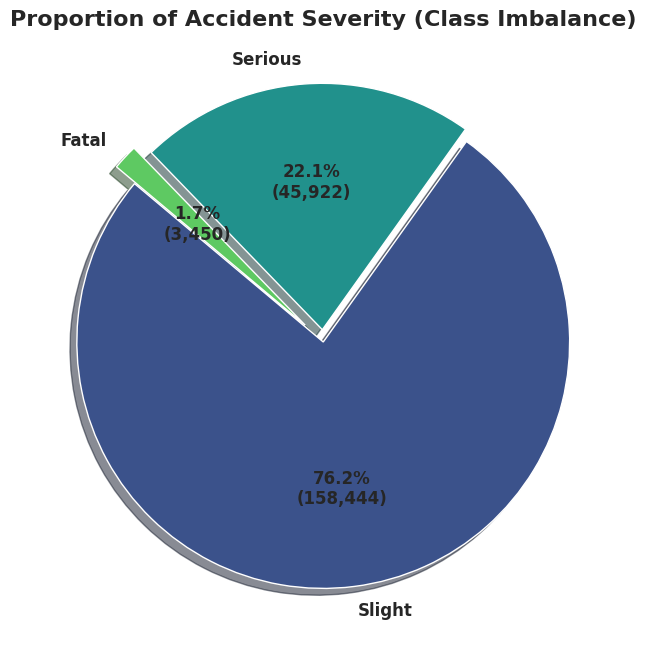

In [ ]:
# --- Visualization 1: Proportional of Accident Severity (Class Imbalance) ---
plt.figure(figsize=(10, 8))
severity_counts = df['accident_severity'].value_counts()
# Define a consistent order for plotting
sev_order = ['Slight', 'Serious', 'Fatal']
sizes = [severity_counts.get(s, 0) for s in sev_order]
labels = sev_order
explode = (0, 0.05, 0.1) # Explode 'Serious' and 'Fatal' slices slightly
colors = sns.color_palette('viridis', len(labels))
# Define a function to format the labels with both percentage and absolute count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})' # Format with one decimal place and comma for thousands
    return my_autopct
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes),
        shadow=True, startangle=140, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Proportion of Accident Severity (Class Imbalance)', fontsize=16, fontweight='bold')
plt.savefig('1_severity_pie_chart.png') # Save the plot as an image file
plt.show() # Display the plot

📊 Generating Visualization 1: Accident Frequency Heatmap...


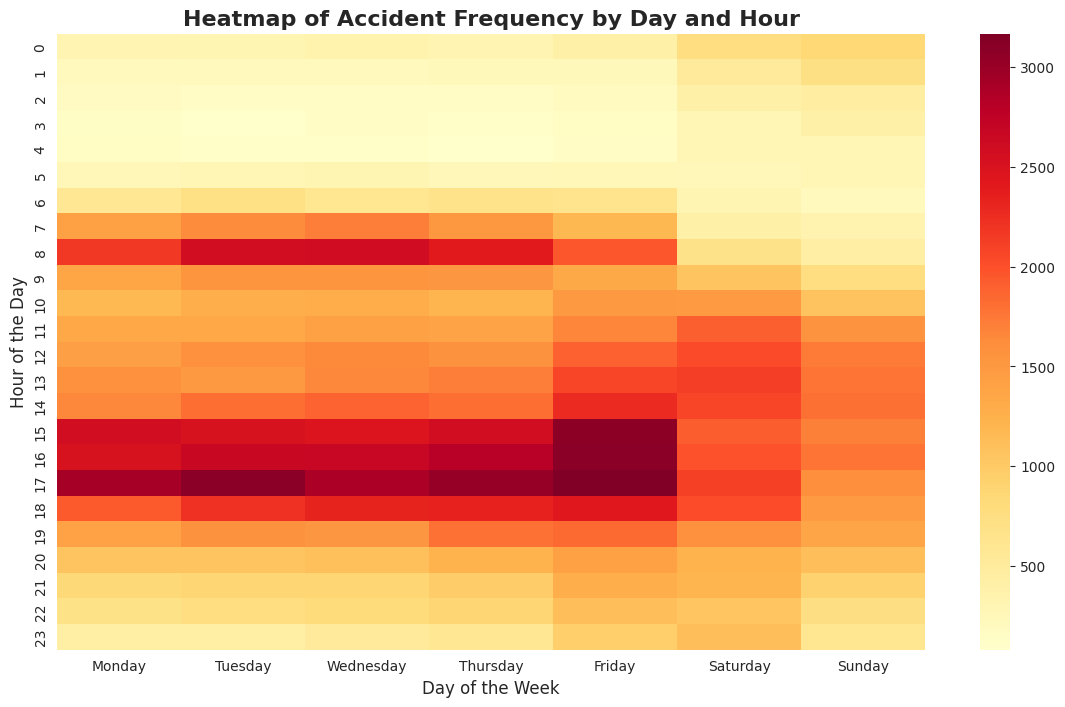

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Visualization 2: Accident Frequency Heatmap ---
print("📊 Generating Visualization 1: Accident Frequency Heatmap...")
try:
    # Create a frequency table (crosstab) of accidents by day and hour
    frequency_table = pd.crosstab(df['hour'], df['day_of_week'])

    # Order the days of the week logically
    frequency_table = frequency_table[day_order]

    plt.figure(figsize=(14, 8))
    sns.heatmap(frequency_table, cmap="YlOrRd", annot=False)
    plt.title('Heatmap of Accident Frequency by Day and Hour', fontsize=16, weight='bold')
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Hour of the Day', fontsize=12)
    plt.show()
except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('2_Heat_map.png') # Save the plot as an image file


📊 Generating Plot: Accident Severity by Urban or Rural Area...


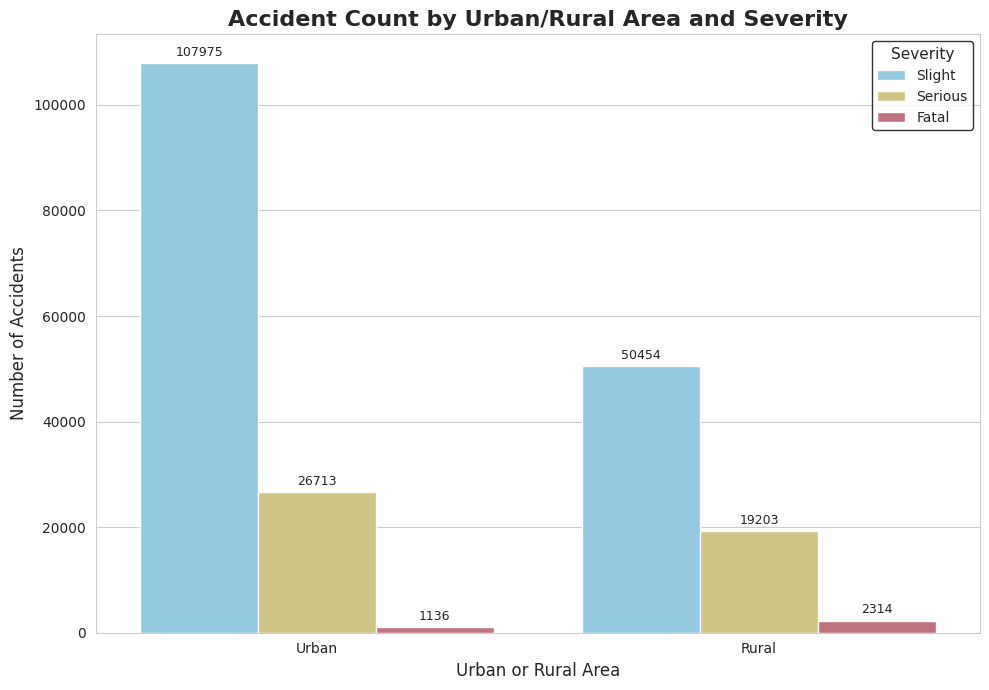

In [ ]:
# --- Visualization 3: Accident Count by Urban/Rural Area and Severity ---
print("\n📊 Generating Plot: Accident Severity by Urban or Rural Area...")
if 'urban_or_rural_area' in df.columns and 'accident_severity' in df.columns:

    # --- START: Filter out unwanted categories ---
    # Create a new DataFrame that only includes 'Urban' and 'Rural' areas
    plot_df = df[df['urban_or_rural_area'].isin(['Urban', 'Rural'])].copy()
    # --- END: Filter out unwanted categories ---

    plt.figure(figsize=(10, 7))

    # Colorblind-friendly palette
    severity_palette = {
        'Slight': '#88CCEE',
        'Serious': '#DDCC77',
        'Fatal': '#CC6677'
    }

    # Define severity order for consistency
    sev_order = ['Slight', 'Serious', 'Fatal']

    # Bar plot using the CLEANED data
    ax = sns.countplot(
        data=plot_df, # Use the filtered DataFrame
        x='urban_or_rural_area',
        hue='accident_severity',
        hue_order=sev_order,
        palette=[severity_palette[sev] for sev in sev_order if sev in plot_df['accident_severity'].unique()]
    )

    # Title and axes
    plt.title('Accident Count by Urban/Rural Area and Severity', fontsize=16, fontweight='bold')
    plt.xlabel('Urban or Rural Area', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)

    # Legend inside plot at the upper right
    plt.legend(
        title='Severity',
        loc='upper right',
        frameon=True,
        edgecolor='black',
        fontsize=10,
        title_fontsize=11
    )

    # Add value labels on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3, fontsize=9)

    plt.tight_layout()
    plt.savefig('3_severity_by_urban_rural.png')
    plt.show()
else:
    print("Columns 'urban_or_rural_area' or 'accident_severity' not found. Skipping this plot.")


📊 Generating Visualization 2: Accidents by Season...


/tmp/ipython-input-1702761521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='season', order=season_order, palette='viridis')


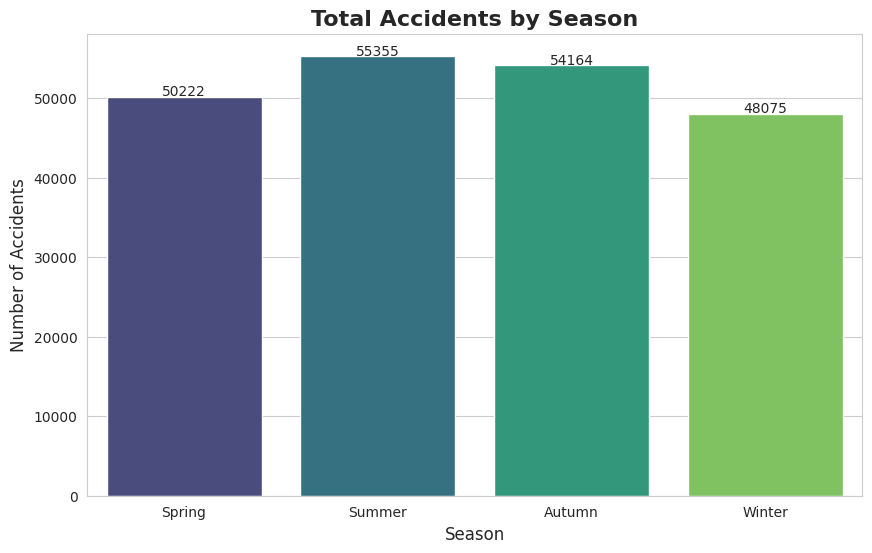

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Visualization 4: Accidents by Season ---
print("\n📊 Generating Visualization 2: Accidents by Season...")
try:
    plt.figure(figsize=(10, 6))
    season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
    ax = sns.countplot(data=df, x='season', order=season_order, palette='viridis')
    ax.set_title('Total Accidents by Season', fontsize=16, weight='bold')
    ax.set_xlabel('Season', fontsize=12)
    ax.set_ylabel('Number of Accidents', fontsize=12)
    show_values_on_bars(ax, h_v="v", space=100) # Add labels to bars
    plt.show()
except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('4_Accidents_by_season.png') # Save the plot as an image file


📊 Generating Visualization 4: Severity by Environmental Hazard...


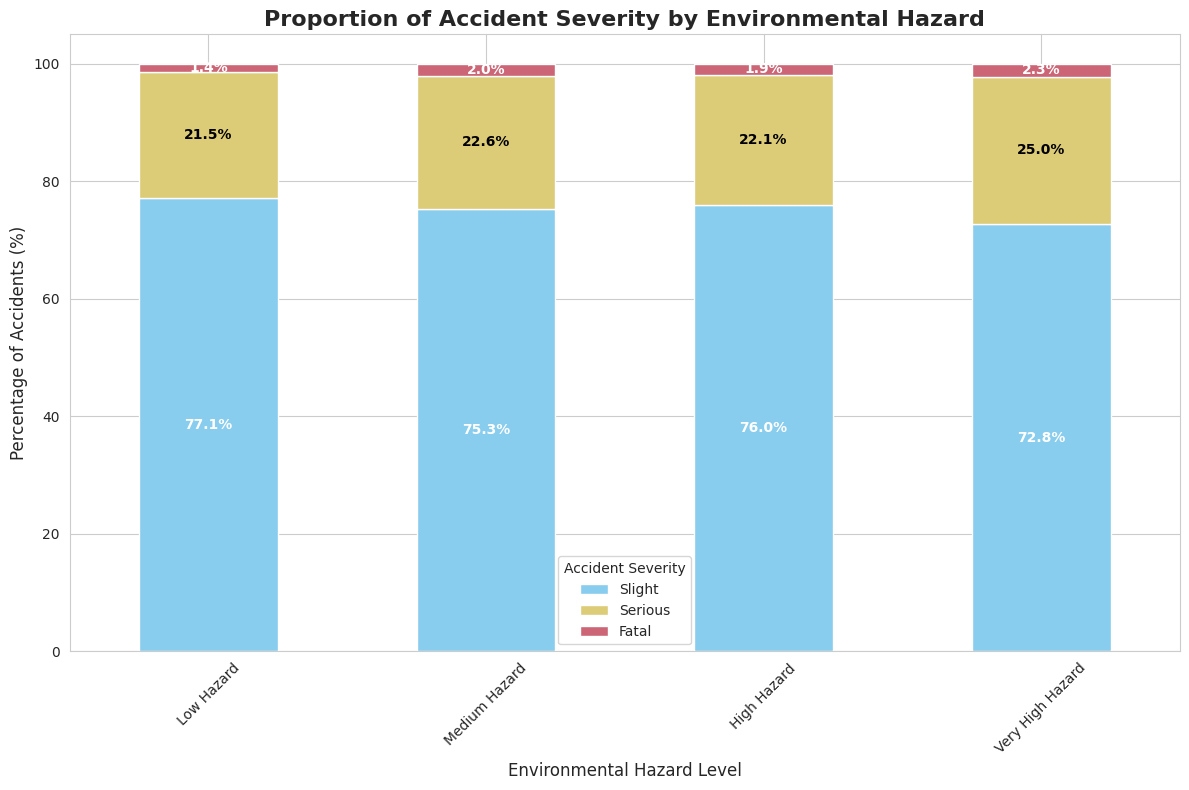

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Visualization 5: Severity by Environmental Hazard ---
print("\n📊 Generating Visualization 4: Severity by Environmental Hazard...")
try:
    # Create a crosstab and normalize it to get proportions
    hazard_severity = pd.crosstab(df['environmental_hazard'], df['accident_severity'], normalize='index') * 100
    hazard_order = ['Low Hazard', 'Medium Hazard', 'High Hazard', 'Very High Hazard']
    hazard_severity = hazard_severity.reindex(hazard_order)

    # --- START: Integrated Color and Label Logic ---

    # 1. Define the specific color palette
    severity_colors = {
        'Slight': '#88CCEE',   # light blue
        'Serious': '#DDCC77',  # soft yellow
        'Fatal': '#CC6677'     # soft red
    }

    # 2. Create an ordered list of colors and severity levels for plotting
    sev_order = ['Slight', 'Serious', 'Fatal']

    # Filter out any severity levels not present in this specific data
    plot_sev_order = [s for s in sev_order if s in hazard_severity.columns]
    plot_colors = [severity_colors[s] for s in plot_sev_order]

    # Ensure the DataFrame columns match the plot order
    hazard_severity = hazard_severity[plot_sev_order]

    # 3. Plot using the specific color list (instead of a colormap)
    ax = hazard_severity.plot(kind='bar', stacked=True, figsize=(12, 8), color=plot_colors)

    # 4. Add labels with dynamic text color for readability
    for i, container in enumerate(ax.containers):
        # Get the severity level corresponding to the current container
        sev_level = plot_sev_order[i]

        # Set text to black for the light yellow background, white for others
        text_color = 'black' if severity_colors[sev_level] == '#DDCC77' else 'white'

        ax.bar_label(container, label_type='center', fmt='%.1f%%', weight='bold', color=text_color)

    # --- END: Integrated Color and Label Logic ---

    ax.set_title('Proportion of Accident Severity by Environmental Hazard', fontsize=16, weight='bold')
    ax.set_xlabel('Environmental Hazard Level', fontsize=12)
    ax.set_ylabel('Percentage of Accidents (%)', fontsize=12)
    plt.xticks(rotation=45)
    ax.legend(title='Accident Severity')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('5_Severity_by_environmental hazard.png') # Save the plot as an image file


📊 Generating Visualization 5: Road Geometry vs. Severity...


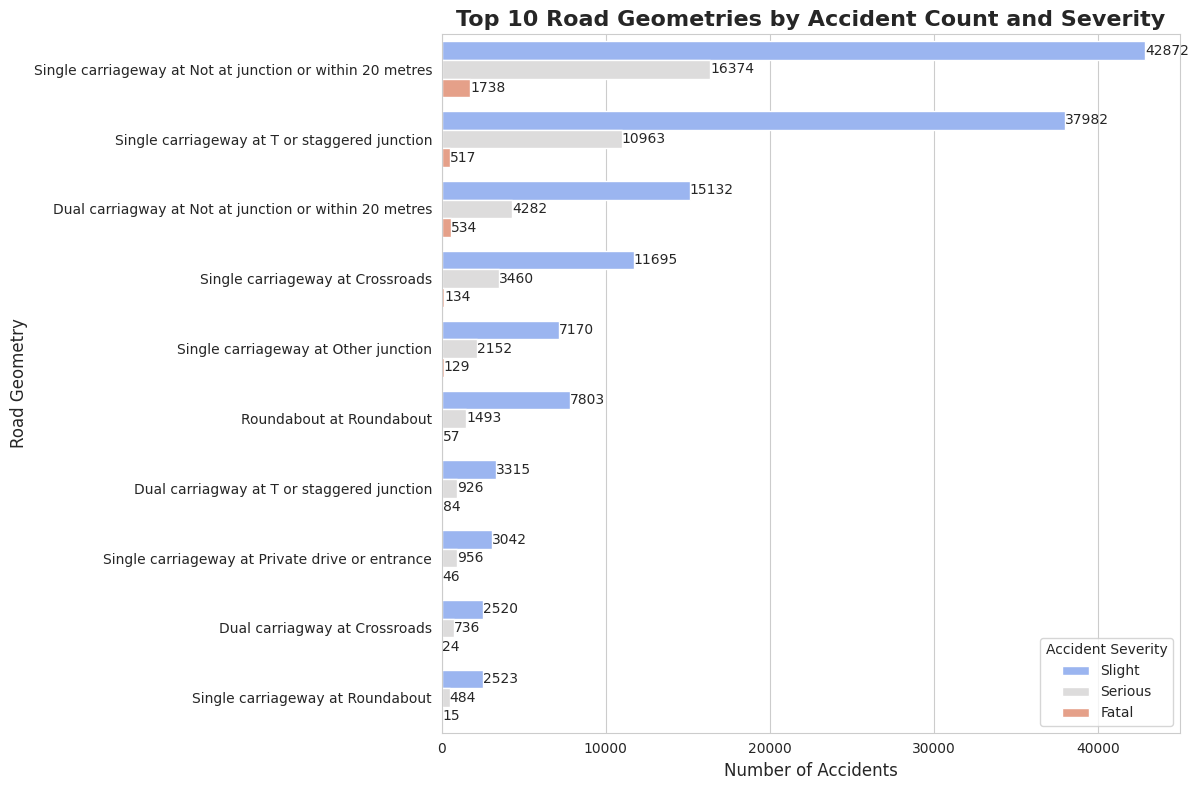

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Visualization 6: Road Geometry vs. Severity ---
print("\n📊 Generating Visualization 5: Road Geometry vs. Severity...")
try:
    # To make the plot readable, let's focus on the top 10 most common road geometries
    top_10_geometries = df['road_geometry'].value_counts().nlargest(10).index
    df_top_geo = df[df['road_geometry'].isin(top_10_geometries)]

    plt.figure(figsize=(12, 8))
    ax = sns.countplot(data=df_top_geo, y='road_geometry', hue='accident_severity',
                       order=top_10_geometries, palette='coolwarm')

    # --- Code added to display labels on bars ---
    for container in ax.containers:
        ax.bar_label(container)
    # --- End of added code ---

    ax.set_title('Top 10 Road Geometries by Accident Count and Severity', fontsize=16, weight='bold')
    ax.set_xlabel('Number of Accidents', fontsize=12)
    ax.set_ylabel('Road Geometry', fontsize=12)
    ax.legend(title='Accident Severity')
    plt.tight_layout()
    plt.show()
except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('6_top_10_geometry.png') # Save the plot as an image file


📊 Generating Visualization 7: Driver Risk Profile vs. Severity...


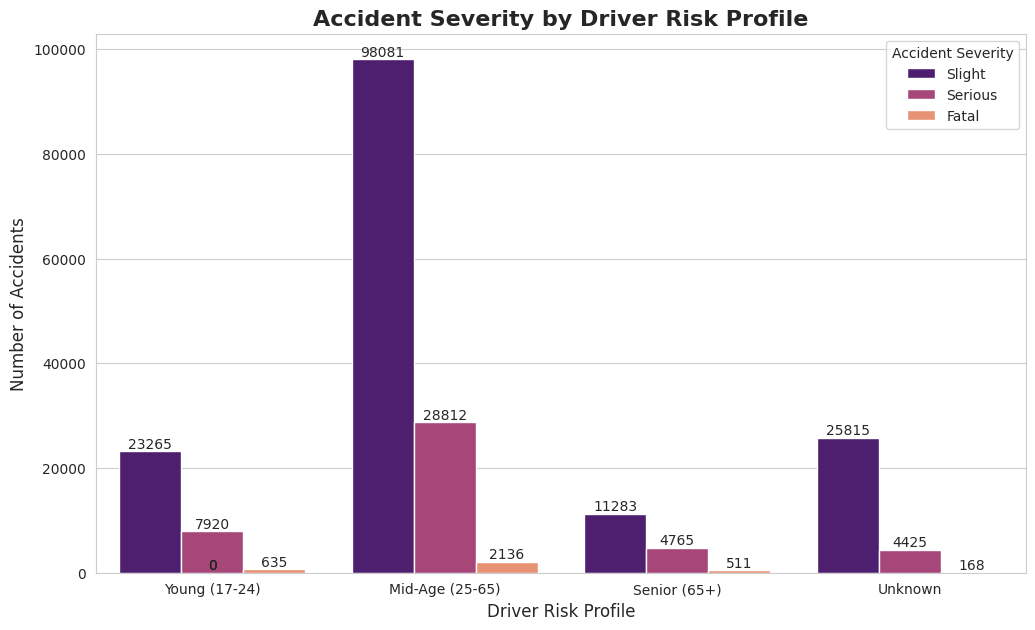

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Visualization 7: Driver Risk Profile vs. Severity ---
print("\n📊 Generating Visualization 7: Driver Risk Profile vs. Severity...")
try:
    plt.figure(figsize=(12, 7))
    risk_order = ['Young (17-24)', 'Mid-Age (25-65)', 'Senior (65+)', 'Unknown']
    ax = sns.countplot(data=df, x='driver_risk_profile', hue='accident_severity', order=risk_order, palette='magma')
    ax.set_title('Accident Severity by Driver Risk Profile', fontsize=16, weight='bold')
    ax.set_xlabel('Driver Risk Profile', fontsize=12)
    ax.set_ylabel('Number of Accidents', fontsize=12)
    ax.legend(title='Accident Severity')

    # Add labels to bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.show()
except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('7_Driver_risk_profile.png') # Save the plot as an image file


📊 Generating Visualization 9: Top 10 Vehicle Types...


/tmp/ipython-input-1148873787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_vehicles.values, y=top_10_vehicles.index, palette='cubehelix')


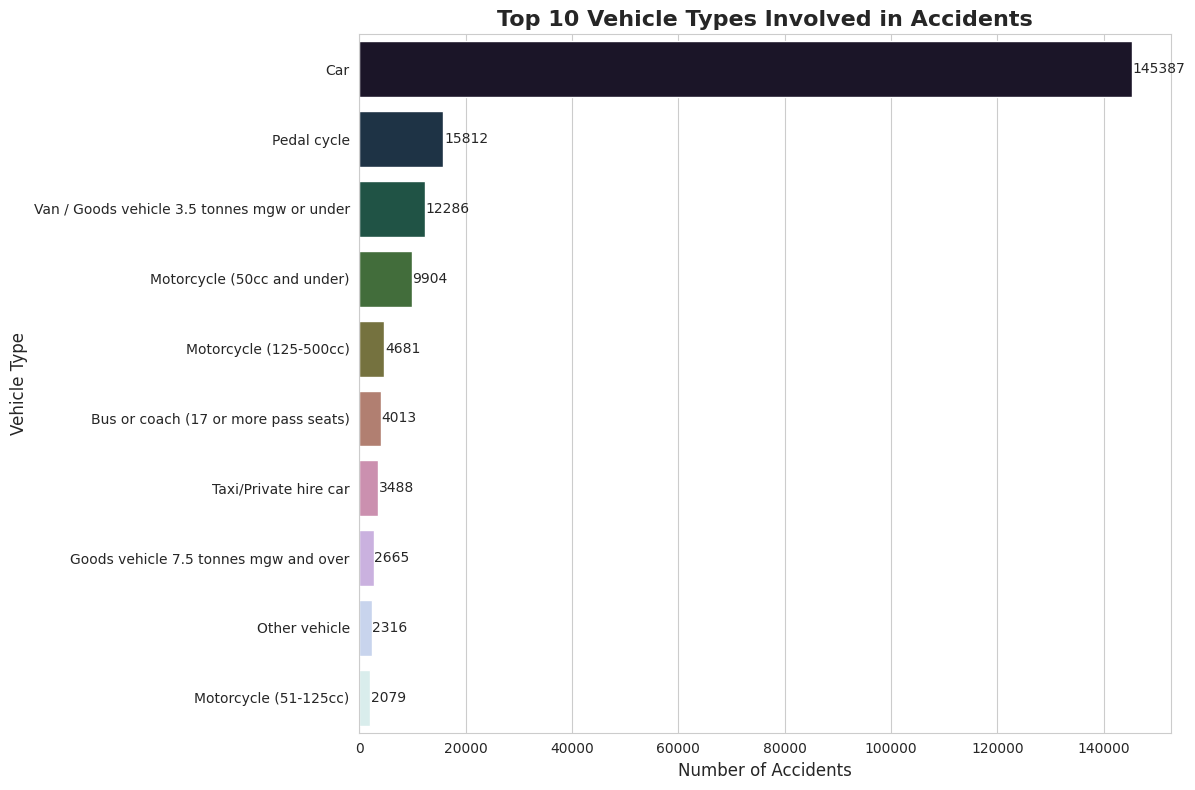

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Visualization 8: Top 10 Vehicle Types in Accidents ---
print("\n📊 Generating Visualization 9: Top 10 Vehicle Types...")
try:
    top_10_vehicles = df['vehicle_type'].value_counts().nlargest(10)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=top_10_vehicles.values, y=top_10_vehicles.index, palette='cubehelix')
    ax.set_title('Top 10 Vehicle Types Involved in Accidents', fontsize=16, weight='bold')
    ax.set_xlabel('Number of Accidents', fontsize=12)
    ax.set_ylabel('Vehicle Type', fontsize=12)
    show_values_on_bars(ax, h_v="h", space=100) # Add labels to bars
    plt.tight_layout()
    plt.show()
except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('8_Vehicle_accident.png') # Save the plot as an image file


📊 Generating Visualization 10: Accident Severity by Road Type...


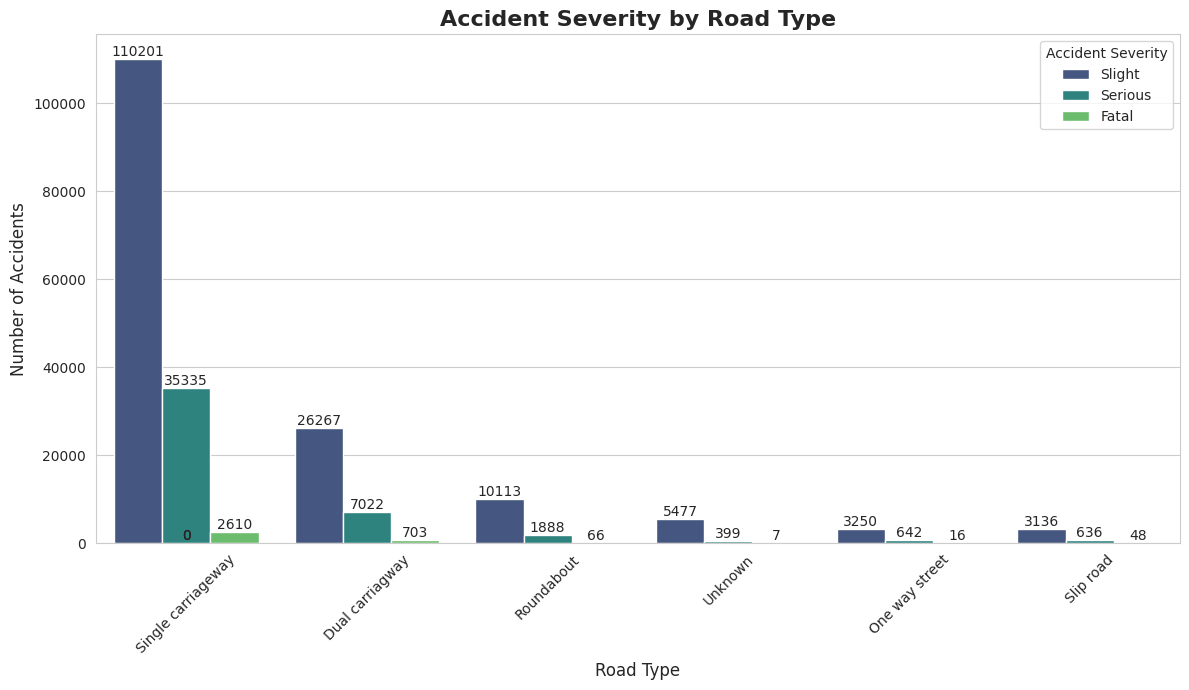

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Visualization 9: Accident Severity by Road Type ---
print("\n📊 Generating Visualization 10: Accident Severity by Road Type...")
try:
    plt.figure(figsize=(12, 7))
    # Get the order of road types by frequency
    road_type_order = df['road_type'].value_counts().index
    ax = sns.countplot(data=df, x='road_type', hue='accident_severity', order=road_type_order, palette='viridis')
    ax.set_title('Accident Severity by Road Type', fontsize=16, weight='bold')
    ax.set_xlabel('Road Type', fontsize=12)
    ax.set_ylabel('Number of Accidents', fontsize=12)
    ax.legend(title='Accident Severity')
    # Add labels to bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('9_Severity_road_type.png') # Save the plot as an image file


📊 Generating Visualization 11: Top 10 Weather Conditions...


/tmp/ipython-input-1952539342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_weather.values, y=top_10_weather.index, palette='Blues_d')


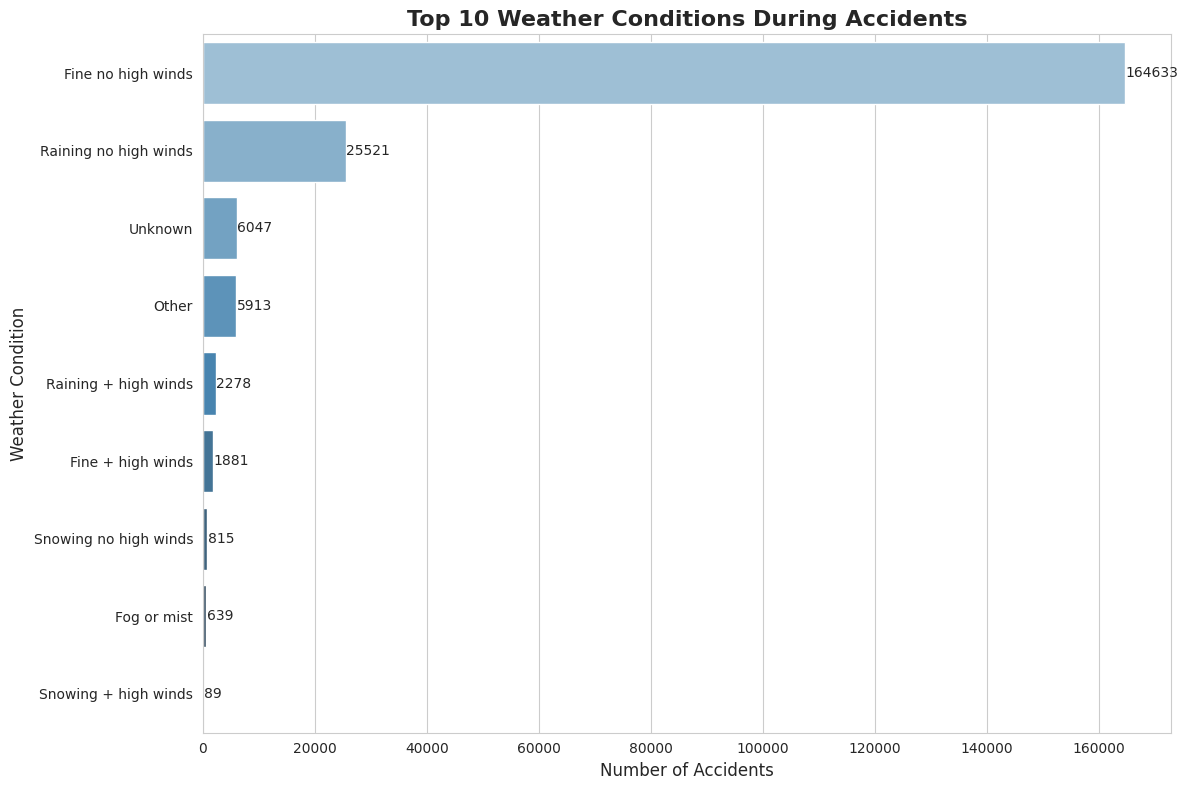

<Figure size 1200x700 with 0 Axes>

In [ ]:
# --- Visualization 10: Top 10 Weather Conditions in Accidents ---
print("\n📊 Generating Visualization 11: Top 10 Weather Conditions...")
try:
    top_10_weather = df['weather_conditions'].value_counts().nlargest(10)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=top_10_weather.values, y=top_10_weather.index, palette='Blues_d')
    ax.set_title('Top 10 Weather Conditions During Accidents', fontsize=16, weight='bold')
    ax.set_xlabel('Number of Accidents', fontsize=12)
    ax.set_ylabel('Weather Condition', fontsize=12)
    show_values_on_bars(ax, h_v="h", space=100)
    plt.tight_layout()
    plt.show()
except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('10_weather_conditions.png') # Save the plot as an image file

In [ ]:
# --- Visualization 11: Junction Control vs. Severity Proportion ---
print("\n📊 Generating Visualization 12: Junction Control vs. Severity Proportion...")
try:
    # Filter out 'Data missing or out of range' for a cleaner plot
    df_junction = df[~df['junction_control'].str.contains('Data missing')]

    # Create a crosstab and normalize it to get proportions
    junction_severity = pd.crosstab(df_junction['junction_control'], df_junction['accident_severity'], normalize='index') * 100

    ax = junction_severity.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
    ax.set_title('Proportion of Accident Severity by Junction Control', fontsize=16, weight='bold')
    ax.set_xlabel('Junction Control Type', fontsize=12)
    ax.set_ylabel('Percentage of Accidents (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    ax.legend(title='Accident Severity')
    plt.tight_layout()
    plt.show()
except KeyError as e:
    print(f"  - Skipping plot: Missing required column {e}")
except Exception as e:
    print(f"  - An error occurred: {e}")
plt.savefig('11_junctn_control.png') # Save the plot as an image file


📊 Generating Visualization 12: Junction Control vs. Severity Proportion...
  - An error occurred: bad operand type for unary ~: 'float'


<Figure size 1200x700 with 0 Axes>

/tmp/ipython-input-72334222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='accident_severity', y='speed_limit', order=sev_order, palette='crest')


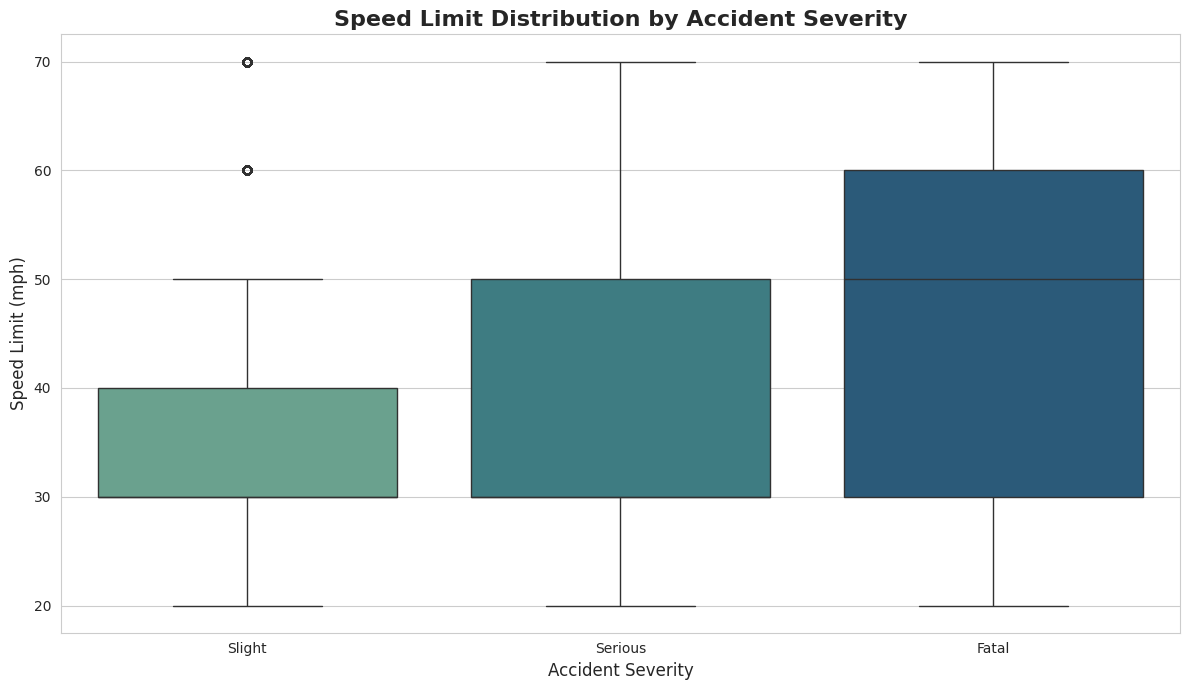

In [ ]:
# --- Visualization 12: Speed Limit Distribution by Accident Severity ---
plt.figure()
sns.boxplot(data=df, x='accident_severity', y='speed_limit', order=sev_order, palette='crest')
plt.title('Speed Limit Distribution by Accident Severity', fontsize=16, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Speed Limit (mph)', fontsize=12)
plt.tight_layout()
plt.savefig('12_speed_limit_by_severity.png')
plt.show()


Generating Plot 13: Time Series of Accidents by Severity (Monthly Counts, 2023)...


/tmp/ipython-input-3201175387.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_severity_sum = daily_severity_counts.resample('M').sum()


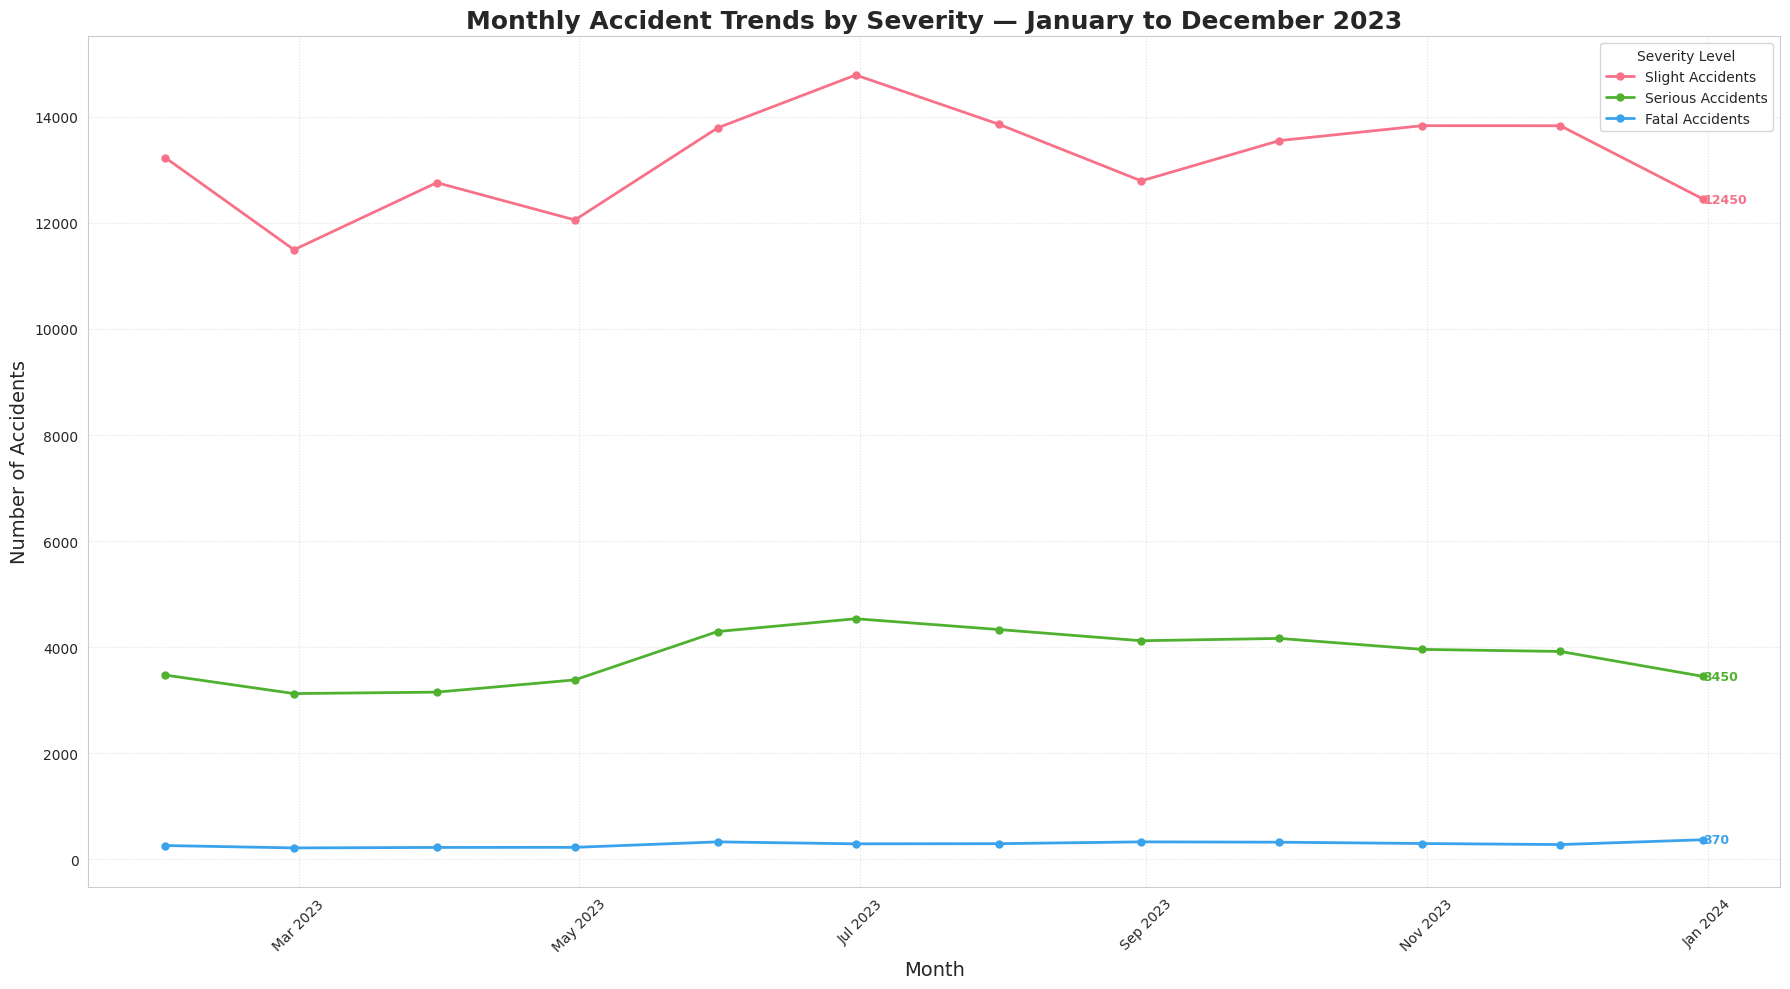

In [ ]:
print("\nGenerating Plot 13: Time Series of Accidents by Severity (Monthly Counts, 2023)...")

if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']) and 'accident_severity' in df.columns:
    # Filter for January–December 2023
    start_date = '2023-01-01'
    end_date = '2023-12-31'
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df_2023 = df.loc[mask]

    # Group by date and severity, then resample to daily counts
    daily_severity_counts = (
        df_2023
        .set_index('date')
        .groupby('accident_severity')
        .resample('D')
        .size()
        .unstack(level=0, fill_value=0)
    )

    # Ensure columns match order if defined
    if all(s in daily_severity_counts.columns for s in sev_order):
        daily_severity_counts = daily_severity_counts[sev_order]
    else:
        print(f"Warning: Not all severity levels {sev_order} present. Plotting available columns.")

    # Monthly sums
    monthly_severity_sum = daily_severity_counts.resample('M').sum()

    plt.figure(figsize=(18, 10))
    ax = plt.gca()

    colors = sns.color_palette("husl", len(monthly_severity_sum.columns))

    for i, severity in enumerate(monthly_severity_sum.columns):
        line, = ax.plot(
            monthly_severity_sum.index,
            monthly_severity_sum[severity],
            label=f'{severity} Accidents',
            linewidth=2.0,
            marker='o',
            markersize=5,
            linestyle='-',
            color=colors[i]
        )

        if not monthly_severity_sum[severity].empty:
            last_date = monthly_severity_sum.index[-1]
            last_value = monthly_severity_sum[severity].iloc[-1]
            ax.text(
                last_date,
                last_value,
                f'{last_value}',
                va='center',
                ha='left',
                color=line.get_color(),
                fontsize=9,
                fontweight='bold'
            )

    plt.title('Monthly Accident Trends by Severity — January to December 2023',
              fontsize=18, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.legend(title='Severity Level', fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)

    # Format x-axis for months
    ax.xaxis.set_major_formatter(
        plt.matplotlib.dates.DateFormatter('%b %Y')
    )

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('13_timeseries_accidents_by_severity_monthly_2023.png')
    plt.show()

else:
    print("'date' or 'accident_severity' column not found or 'date' not in datetime format. Skipping plot 12.")


FEATURE SELECTION


In [ ]:
# List of original features that were replaced by engineered ones
features_to_drop = [
    'time',
    'day_of_week',
    'weather_conditions',
    'road_surface_conditions',
    'light_conditions',
    'age_of_driver',
    'age_band_of_driver', # Redundant with the new age profile
    'date'
]

# Define the final 23 columns for the model
final_feature_columns = [
    # Core Features
    'first_road_number',
    'local_authority_ons_district',
    'enhanced_severity_collision',
    'number_of_casualties',
    'number_of_vehicles',
    'road_type',
    'vehicle_type',
    'skidding_and_overturning',
    'urban_or_rural_area',
    'speed_limit',
    'junction_detail',

    # Engineered Features
    'time_risk',
    'environmental_hazard',
    'sex_of_driver',
    'driver_risk_profile',
    'season',
    'high_speed_rural',
    'vulnerability_mismatch',

    # Additional High-Value Features
    'first_road_class',
    'junction_control',
    'vehicle_manoeuvre',
    'first_point_of_impact'
]

# esnure the target variable is in place!
final_columns_with_target = ['accident_severity'] + final_feature_columns

# Execute the engineer_features function to create the necessary columns
df_engineered = engineer_features(df_cleaned)

# Create the final dataframe for your model
df_model_ready = df_engineered[final_columns_with_target]

# Display the result
print("--- Model-Ready DataFrame ---")
print(f"Shape: {df_model_ready.shape}")
df = df_model_ready
df.head()

🚀 Starting feature engineering...
 - Preparing date and time columns...
   - 'hour' column already exists.
 - Feature 'time_risk' created.
 - Feature 'environmental_hazard' created.
 - Feature 'driver_risk_profile' created.
 - Feature 'season' created.
 - Feature 'high_speed_rural' created.
 - Feature 'vulnerability_mismatch' created.
 - Features 'month', 'day_of_month', 'year', 'year_month' created.
 - Feature 'is_weekend' created.
 - Feature 'time_of_day_detailed' created.
 - Feature 'day_time_profile' created.
 - Feature 'speed_limit_binned' created.
 - Created cyclical features 'hour_sin' and 'hour_cos'.
 - Created 'weather_light' interaction feature.
 - Created 'road_geometry' interaction feature.
--- Model-Ready DataFrame ---
Shape: (207816, 23)


accident_severity  first_road_number local_authority_ons_district  \
0            Slight                  0                    E09000024   
1            Slight                  0                    E09000010   
2            Slight                  0                    E09000010   
3            Slight                  0                    E09000010   
4            Slight                437                    E09000017   

  enhanced_severity_collision  number_of_casualties  number_of_vehicles  \
0            Slight Collision                     1                   1   
1            Slight Collision                     2                   3   
2            Slight Collision                     2                   3   
3            Slight Collision                     2                   3   
4            Slight Collision                     1                   2   

            road_type                          vehicle_type  \
0      One way street  Bus or coach (17 or more pass seats)   
1  Single carriageway  Bus or coach (17 or more pass seats)   
2  Single carriageway                                   Car   
3  Single carriageway                                   Car   
4          Roundabout                                   Car   

  skidding_and_overturning urban_or_rural_area  ...  environmental_hazard  \
0                     None               Urban  ...      Very High Hazard   
1                     None               Urban  ...         Medium Hazard   
2                     None               Urban  ...         Medium Hazard   
3                     None               Urban  ...         Medium Hazard   
4                     None               Urban  ...         Medium Hazard   

  sex_of_driver driver_risk_profile  season high_speed_rural  \
0          Male     Mid-Age (25-65)  Winter            False   
1          Male     Mid-Age (25-65)  Winter            False   
2          Male     Mid-Age (25-65)  Winter            False   
3          Male     Mid-Age (25-65)  Winter            False   
4          Male     Mid-Age (25-65)  Winter            False   

  vulnerability_mismatch first_road_class          junction_control  \
0                  False                C  Give way or uncontrolled   
1                  False     Unclassified  Give way or uncontrolled   
2                  False     Unclassified  Give way or uncontrolled   
3                  False     Unclassified  Give way or uncontrolled   
4                  False                A  Give way or uncontrolled   

      vehicle_manoeuvre first_point_of_impact  
0              Stopping                 Front  
1     Going ahead other                 Front  
2         Turning right              Nearside  
3  Waiting to turn left                 Front  
4     Going ahead other              Nearside  

[5 rows x 23 columns]

In [ ]:
data = df

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207816 entries, 0 to 207815
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   accident_severity             207816 non-null  object  
 1   first_road_number             207816 non-null  int64   
 2   local_authority_ons_district  207816 non-null  object  
 3   enhanced_severity_collision   207816 non-null  object  
 4   number_of_casualties          207816 non-null  int64   
 5   number_of_vehicles            207816 non-null  int64   
 6   road_type                     207816 non-null  object  
 7   vehicle_type                  207816 non-null  object  
 8   skidding_and_overturning      207816 non-null  object  
 9   urban_or_rural_area           207816 non-null  object  
 10  speed_limit                   207816 non-null  int64   
 11  junction_detail               207816 non-null  object  
 12  time_risk                     

CLASSIFICATION PROPER

In [ ]:
!pip install imbalanced-learn

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import NearMiss  # Import NearMiss from under_sampling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
! pip install catboost
import catboost

print(f"CatBoost version: {catboost.__version__}")

CatBoost version: 1.2.8


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select columns with object, category, and boolean types
cols_to_encode = data.select_dtypes(include=['object', 'category', 'bool']).columns
label_encoders = {}

# Encode the selected features
for col in cols_to_encode:
    le = LabelEncoder()
    # astype(str) handles all types consistently before encoding
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

print("Categorical, category, and boolean columns encoded.")

/tmp/ipython-input-283622614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
/tmp/ipython-input-283622614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
/tmp/ipython-input-283622614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Categorical, category, and boolean columns encoded.


/tmp/ipython-input-283622614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
/tmp/ipython-input-283622614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
/tmp/ipython-input-283622614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
# Encode the target variable (accident_severity)
y = data['accident_severity']  # Target variable
y = LabelEncoder().fit_transform(y)  # Label encode the target variable
print("2. Target variable 'accident_severity' encoded.")

# Separate features from target
X = data.drop('accident_severity', axis=1)  # Features
print("3. Features separated. X shape:", X.shape)
print(X.head())

2. Target variable 'accident_severity' encoded.
3. Features separated. X shape: (207816, 22)
   first_road_number  local_authority_ons_district  \
0                  0                           286   
1                  0                           272   
2                  0                           272   
3                  0                           272   
4                437                           279   

   enhanced_severity_collision  number_of_casualties  number_of_vehicles  \
0                            4                     1                   1   
1                            4                     2                   3   
2                            4                     2                   3   
3                            4                     2                   3   
4                            4                     1                   2   

   road_type  vehicle_type  skidding_and_overturning  urban_or_rural_area  \
0          1             2                      

In [ ]:
# Scale numerical features
numerical_cols = X.select_dtypes(include=['int64', 'int32']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])  # Scaling only numerical columns
print("4. Numerical features scaled.")
print(X.head())

4. Numerical features scaled.
   first_road_number  local_authority_ons_district  \
0          -0.500193                      1.059844   
1          -0.500193                      0.923621   
2          -0.500193                      0.923621   
3          -0.500193                      0.923621   
4          -0.223767                      0.991732   

   enhanced_severity_collision  number_of_casualties  number_of_vehicles  \
0                     0.366219             -0.315527           -1.242672   
1                     0.366219              0.287391            1.070262   
2                     0.366219              0.287391            1.070262   
3                     0.366219              0.287391            1.070262   
4                     0.366219             -0.315527           -0.086205   

   road_type  vehicle_type  skidding_and_overturning  urban_or_rural_area  \
0  -1.225501     -0.738724                  0.129948             0.727997   
1   0.420992     -0.738724        

In [ ]:
# Step 2: Split into Train and Test (80% / 20% Split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"6. Data split. X_train shape: {X_train.shape}, X_temp shape: {X_temp.shape}")

# Further split the 10% temp data into 50% test and 50% validation to get a 80/10/10 split
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"7. Further split into validation and test sets. X_test shape: {X_test.shape}, X_val shape: {X_val.shape}")

6. Data split. X_train shape: (166252, 22), X_temp shape: (41564, 22)
7. Further split into validation and test sets. X_test shape: (20782, 22), X_val shape: (20782, 22)


In [ ]:
# Step 3: Data Balancing (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"5. Data resampled. New X_train_resampled shape: {X_train_resampled.shape}, y_train_resampled shape: {y_train_resampled.shape}")

class_distribution_after_smote = pd.Series(y_train_resampled).value_counts().reset_index()
class_distribution_after_smote.columns = ['Class Label', 'Number of Samples']
print("\nClass distribution after SMOTE:")
print(class_distribution_after_smote.head())

5. Data resampled. New X_train_resampled shape: (380265, 22), y_train_resampled shape: (380265,)

Class distribution after SMOTE:
   Class Label  Number of Samples
0            2             126755
1            1             126755
2            0             126755


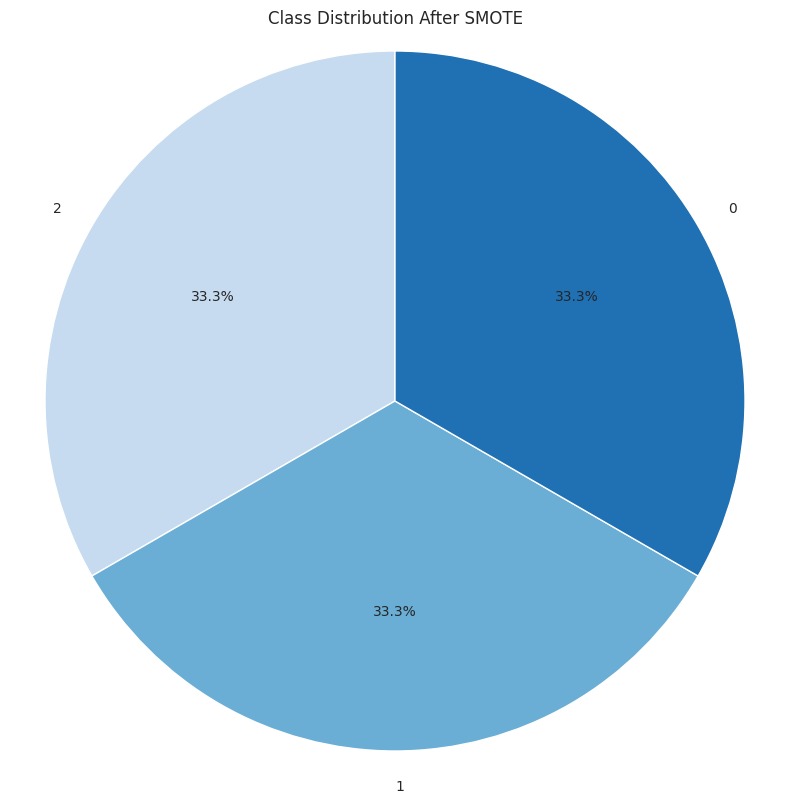

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Import numpy

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))  # Single plot, larger size for clarity

# Plot the class distribution after NearMiss as a pie chart
# Convert the numpy array to a pandas Series to use value_counts()
class_dist_after_nm = pd.Series(y_train_resampled).value_counts()  # Get the class distribution

ax.pie(class_dist_after_nm, labels=class_dist_after_nm.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(class_dist_after_nm)))
ax.set_title('Class Distribution After SMOTE')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig('After_SMOTE.png')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight

# --- 1. Define Parameter Grids ---
# (Assuming these are defined as in your previous code)

# For XGBoost
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'scale_pos_weight': [1, 2, 3]  # Add this for class imbalance handling
}

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'scale_pos_weight': [1, 2, 3]  # Add this for class imbalance handling
}

In [ ]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Set up GridSearchCV for each model with verbose to show progress
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit GridSearchCV
print("8. Starting GridSearchCV for RandomForest...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters for RandomForest: {grid_search_rf.best_params_}")

print("9. Starting GridSearchCV for XGBoost...")
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

print("10. Starting GridSearchCV for LightGBM...")
grid_search_lgbm.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters for LightGBM: {grid_search_lgbm.best_params_}")


8. Starting GridSearchCV for RandomForest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for RandomForest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
9. Starting GridSearchCV for XGBoost...
Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:30:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}
10. Starting GridSearchCV for LightGBM...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5351
[LightGBM] [Info] Number of data points in the train set: 380265, number of used features: 22
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best parameters for LightGBM: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}


In [ ]:
######################################################################################################################

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt  # Ensure matplotlib is imported for plotting
import seaborn as sns  # Optional: for better confusion matrix visualization
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 6: Train the best models from GridSearchCV

# RandomForest
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)
# Make predictions on the test set using the best model
rf_predictions = best_rf.predict(X_test)

# XGBoost
best_xgb = grid_search_xgb.best_estimator_
best_xgb.fit(X_train, y_train)
# Make predictions on the test set using the best model
xgb_predictions = best_xgb.predict(X_test)


# LightGBM
best_lgbm = grid_search_lgbm.best_estimator_
best_lgbm.fit(X_train, y_train)
# Make predictions on the test set using the best model
lgbm_predictions = best_lgbm.predict(X_test)


# Step 7: Threshold Adjustment (for optimizing recall for minority classes)
def adjust_threshold(model, X, threshold=0.3):
    """
    Adjusts predictions based on a custom probability threshold.

    Args:
        model: The trained model.
        X: The data (e.g., test data) to predict on.
        threshold (float): The probability threshold.

    Returns:
        np.ndarray: Adjusted predictions.
    """
    # Calculate probabilities
    probas = model.predict_proba(X)

    # Standard prediction based on max probability
    return np.argmax(probas, axis=1)


# Adjust thresholds for XGBoost, RandomForest, and LightGBM using X_test
xgb_adjusted_preds = adjust_threshold(best_xgb, X_test)
rf_adjusted_preds = adjust_threshold(best_rf, X_test)
lgbm_adjusted_preds = adjust_threshold(best_lgbm, X_test)


# Update predictions with the results from the adjust_threshold function
rf_predictions = rf_adjusted_preds
xgb_predictions = xgb_adjusted_preds
lgbm_predictions = lgbm_adjusted_preds

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:00:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 166252, number of used features: 22
[LightGBM] [Info] Start training from score -4.098274
[LightGBM] [Info] Start training from score -1.509720
[LightGBM] [Info] Start training from score -0.271249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       345
           1       0.99      0.72      0.83      4592
           2       0.92      1.00      0.96     15845

    accuracy                           0.93     20782
   macro avg       0.97      0.81      0.88     20782
weighted avg       0.94      0.93      0.93     20782

RandomForest Confusion Matrix:


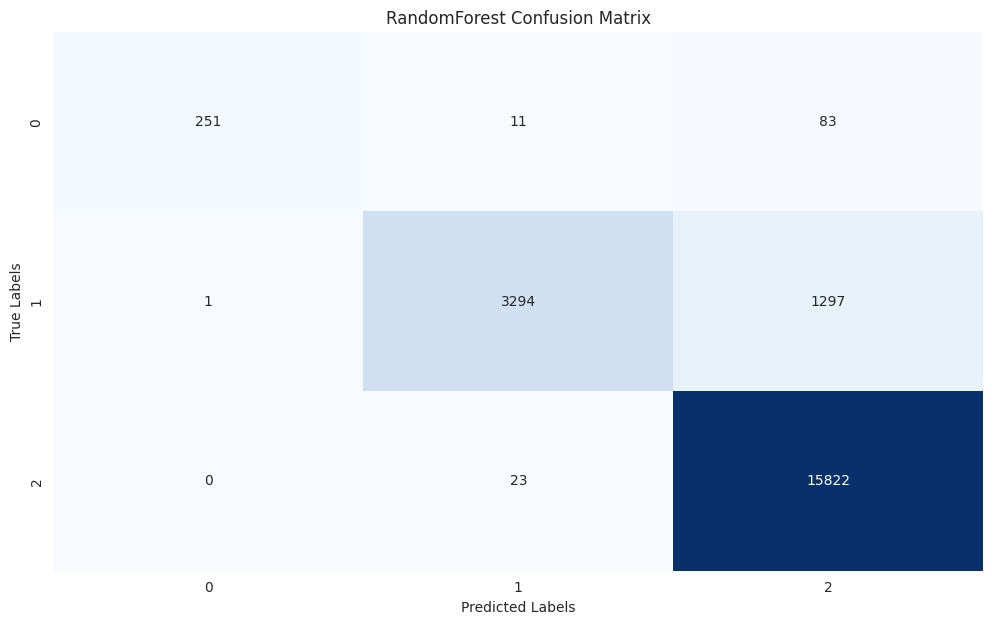

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       345
           1       0.97      0.73      0.83      4592
           2       0.92      0.99      0.96     15845

    accuracy                           0.93     20782
   macro avg       0.96      0.82      0.88     20782
weighted avg       0.93      0.93      0.93     20782

XGBoost Confusion Matrix:


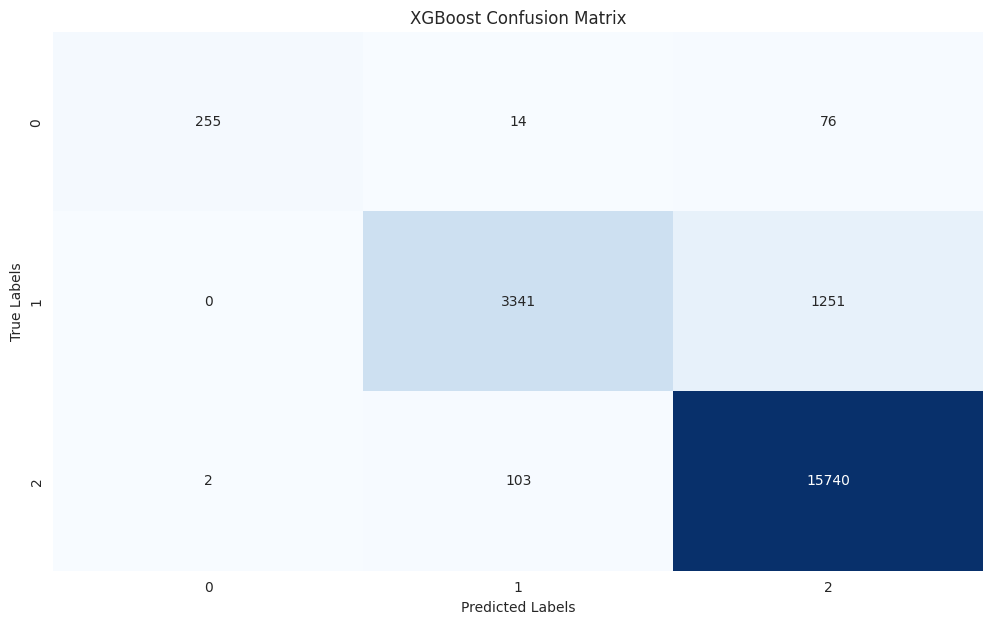

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       345
           1       0.94      0.71      0.81      4592
           2       0.92      0.99      0.95     15845

    accuracy                           0.92     20782
   macro avg       0.94      0.80      0.86     20782
weighted avg       0.92      0.92      0.92     20782

LightGBM Confusion Matrix:


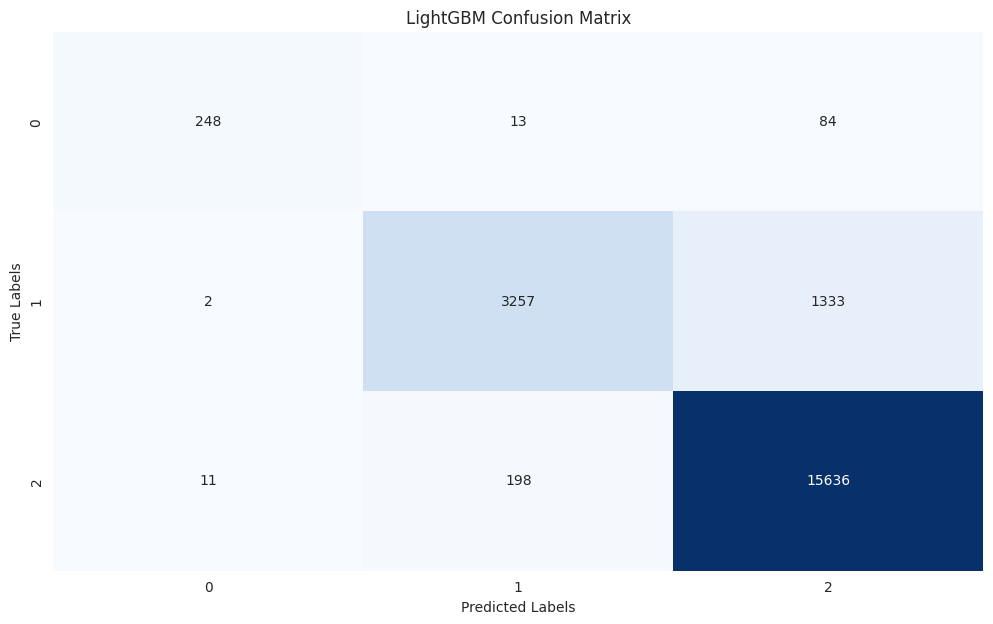

14. RandomForest Accuracy: 0.9319
15. XGBoost Accuracy: 0.9304
16. LightGBM Accuracy: 0.9210


In [ ]:
#Model Evaluation

# RandomForest Evaluation
print("RandomForest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("RandomForest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("RandomForest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# XGBoost Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("XGBoost Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, xgb_predictions)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# LightGBM Evaluation
print("LightGBM Classification Report:")
print(classification_report(y_test, lgbm_predictions))
print("LightGBM Confusion Matrix:")
cm_lgbm = confusion_matrix(y_test, lgbm_predictions)
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 10: Accuracy Scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)

print(f"14. RandomForest Accuracy: {rf_accuracy:.4f}")
print(f"15. XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"16. LightGBM Accuracy: {lgbm_accuracy:.4f}")


Generating feature importance plots...


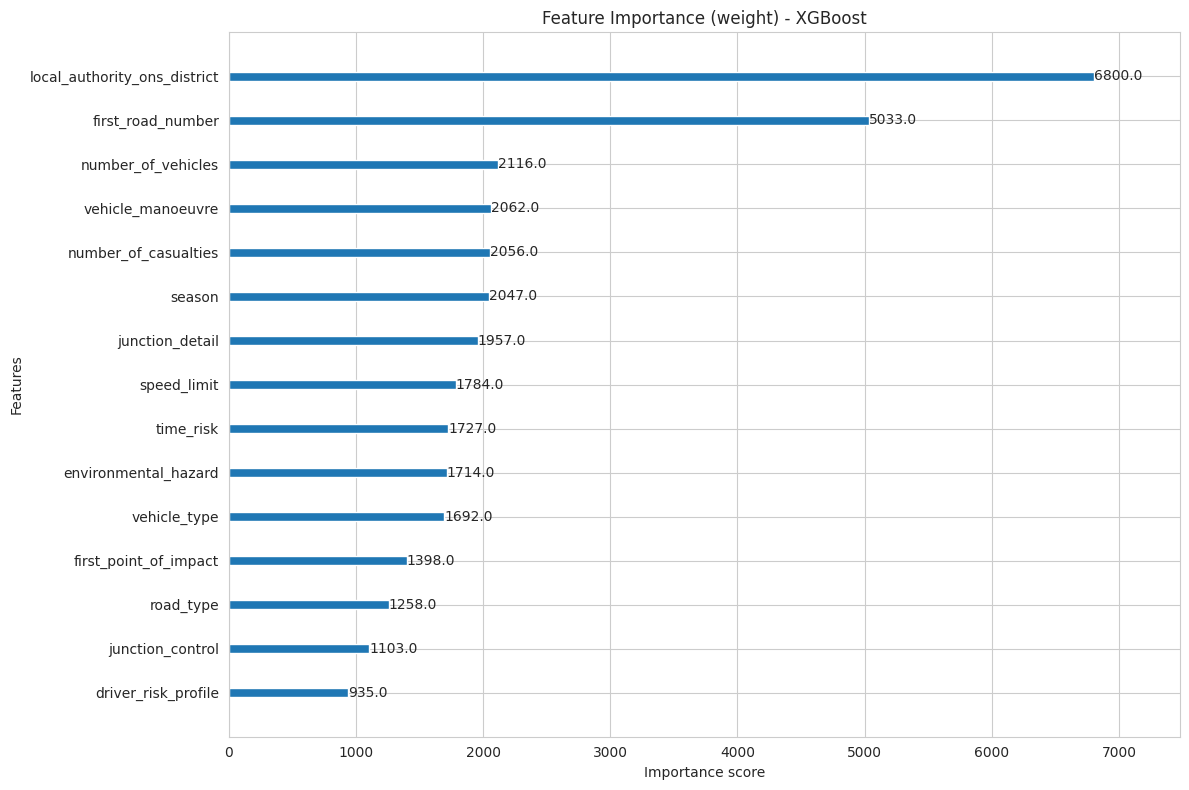

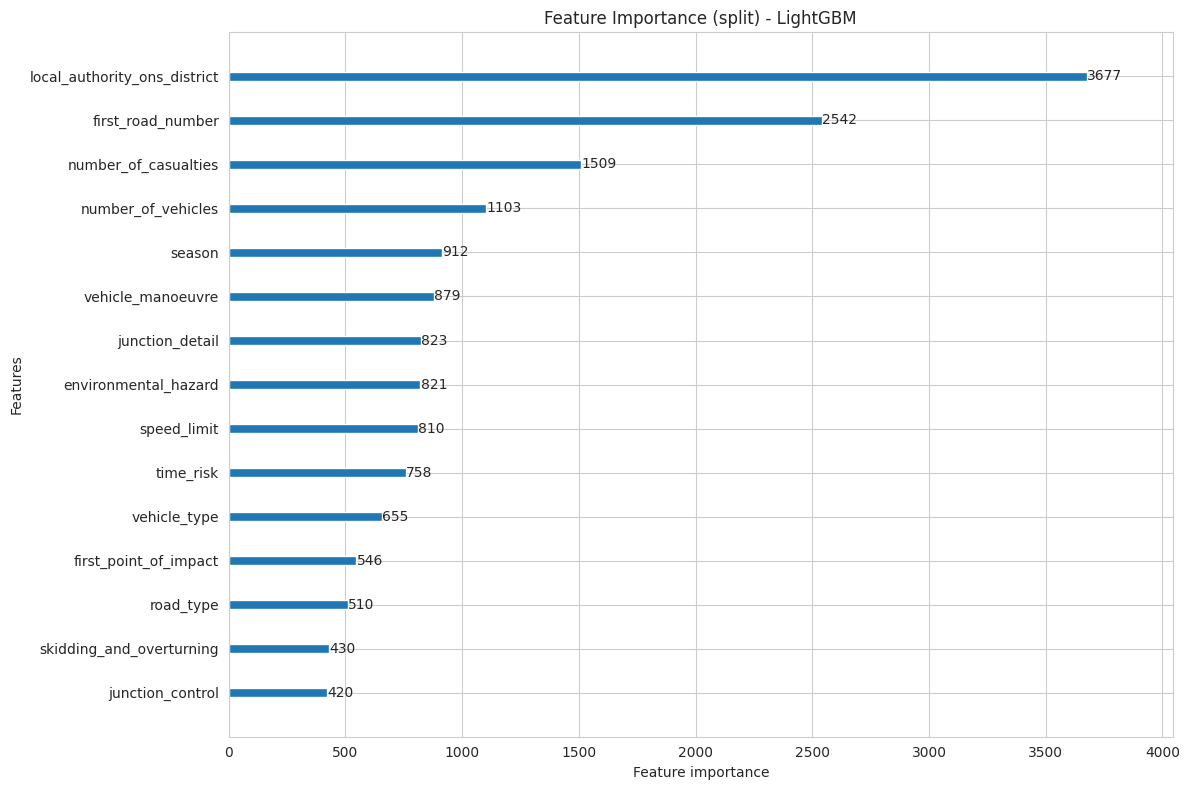

/tmp/ipython-input-108641628.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


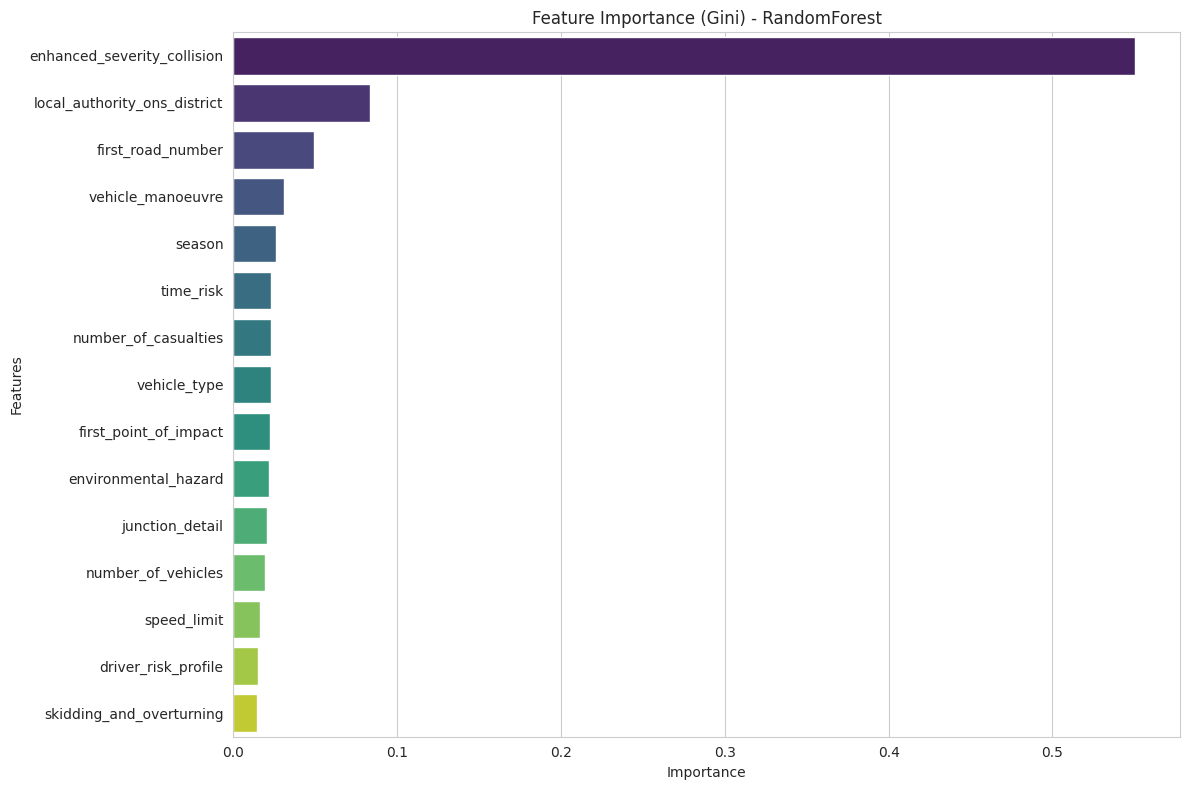


All plots generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier # Make sure to import RandomForest

# Add trained RandomForest model to the list
models = [
    ('XGBoost', best_xgb),
    ('LightGBM', best_lgbm),
    ('RandomForest', best_rf) # Add the new model here
]

# --- Feature Importance Visualization ---
print("Generating feature importance plots...")

for model_name, model in models:
    plt.figure(figsize=(12, 8))

    # XGBoost Feature Importance
    if model_name == 'XGBoost':
        xgb.plot_importance(model, importance_type='weight', max_num_features=15, ax=plt.gca(), title=None)
        plt.title(f'Feature Importance (weight) - {model_name}')

    # LightGBM Feature Importance
    elif model_name == 'LightGBM':
        lgb.plot_importance(model, importance_type='split', max_num_features=15, ax=plt.gca(), title=None)
        plt.title(f'Feature Importance (split) - {model_name}')

    # RandomForest Feature Importance
    elif model_name == 'RandomForest':
        # Get feature importances and names
        importances = model.feature_importances_
        feature_names = X_train.columns

        # Create a DataFrame for easier plotting
        feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

        # Sort by importance and select top 15
        top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(15)

        # Create the plot using seaborn for a consistent look
        sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
        plt.title(f'Feature Importance (Gini) - {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Features')

    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

print("\nAll plots generated.")

In [ ]:
################################################
################LIME PREDICTION#################
################################################

In [ ]:
pip install lime


LIME EXPLANATION

In [ ]:
! pip install lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import numpy as np

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
#################################
####### For Random Forest #######
#################################
# using 'best_rf' is  trained RandomForestClassifier,
class_names = ['Fatal', 'Serious', 'Slight']

# Ensure cols_to_encode is defined and accessible here.
# If not, redefine it based on X_train_resampled.columns

# Create a new list of categorical columns that are actually in X_train_resampled
categorical_features_in_X = [col for col in cols_to_encode if col in X_train_resampled.columns]


# Create the LIME Explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=X_train_resampled.columns.tolist(),
    class_names=class_names,
    categorical_features=[X_train_resampled.columns.get_loc(col) for col in categorical_features_in_X],
    verbose=True,
    mode='classification'
)

# Choose an instance from the test set to explain.
#  (index 0).
instance_to_explain = X_test.iloc[[0]]

# Generate the explanation for the chosen instance.
# ask for the top 10 features.
explanation = explainer.explain_instance(
    instance_to_explain.values[0],
    best_rf.predict_proba,
    num_features=10
)

# To display the explanation in your notebook
explanation.show_in_notebook(show_table=True, show_all=False)

# To save the explanation to an HTML file
explanation.save_to_file('lime_explanation_rf.html')

print("LIME explanation has been generated and saved to 'lime_explanation_rf.html'")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.6722999216438083
Prediction_local [0.11167713]
Right: 0.037450351565700694


LIME explanation has been generated and saved to 'lime_explanation_rf.html'


In [ ]:
###########################
######### For LGBM ########
###########################

# use 'best_lgbm' is your trained LightGBM classifier,


# The class names for 'accident_severity' after label encoding.
# This should match the order of your label encoding: [0, 1, 2]
class_names = ['Fatal', 'Serious', 'Slight']

# Ensure categorical_cols is defined and accessible.
categorical_features_in_X = [col for col in cols_to_encode if col in X_train_resampled.columns]


# Create the LIME Explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=X_train_resampled.columns.tolist(),
    class_names=class_names,
    categorical_features=[X_train_resampled.columns.get_loc(col) for col in categorical_features_in_X],
    verbose=True,
    mode='classification'
)

# Choose an instance from the test set to explain.
# instance (index 0).
instance_to_explain = X_test.iloc[[0]]

# Generate the explanation for the chosen instance using the LightGBM model.
# top 10 features.
explanation = explainer.explain_instance(
    instance_to_explain.values[0],
    best_lgbm.predict_proba,
    num_features=10
)

# To display the explanation in your notebook
explanation.show_in_notebook(show_table=True, show_all=False)

# To save the explanation to an HTML file
explanation.save_to_file('lime_explanation_lgbm.html')

print("LIME explanation for the LightGBM model has been generated and saved to 'lime_explanation_lgbm.html'")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Intercept 0.5759951081046036
Prediction_local [0.40703385]
Right: 0.37907560000246665


LIME explanation for the LightGBM model has been generated and saved to 'lime_explanation_lgbm.html'


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# use 'best_xgb' is your trained XGBoost classifier,

# The class names for 'accident_severity' after label encoding.
# This should match the order of your label encoding: [0, 1, 2]
class_names = ['Fatal', 'Serious', 'Slight']

# Ensure categorical_cols is defined and accessible.
categorical_features_in_X = [col for col in cols_to_encode if col in X_train_resampled.columns]


# Create the LIME Explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=X_train_resampled.columns.tolist(),
    class_names=class_names,
    categorical_features=[X_train_resampled.columns.get_loc(col) for col in categorical_features_in_X],
    verbose=True,
    mode='classification'
)

# Choose an instance from the test set to explain.
# instance (index 0).
instance_to_explain = X_test.iloc[[0]]

# Generate the explanation for the chosen instance using the XGBoost model.
# top 10 features.
explanation = explainer.explain_instance(
    instance_to_explain.values[0],
    best_xgb.predict_proba,
    num_features=10
)

# To display the explanation in your notebook
explanation.show_in_notebook(show_table=True, show_all=False)

# To save the explanation to an HTML file
explanation.save_to_file('lime_explanation_xgb.html')

print("LIME explanation for the XGBoost model has been generated and saved to 'lime_explanation_xgb.html'")

Intercept 0.5302151669850244
Prediction_local [0.14538891]
Right: 0.0010809897


LIME explanation for the XGBoost model has been generated and saved to 'lime_explanation_xgb.html'


Instance Investigation

In [ ]:
# --- 1. Choose which instance to investigate ---
instance_number = 0
instance_to_investigate = X_test.iloc[[instance_number]]


# --- 2. Get the original DataFrame index for this instance ---
original_index = instance_to_investigate.index[0]
print(f"Investigating instance at position {instance_number} in X_test.")
print(f"This corresponds to index {original_index} in your original 'data' DataFrame.\n")


# --- 3. Retrieve the full, original row from my first DataFrame ---
# Make sure  original DataFrame is named 'data'
original_accident_data = data.loc[[original_index]]

print("--- Original Accident Data ---")
# use .T to transpose the row for easier reading
print(original_accident_data.T)


# --- 4. Compare with the model's prediction ---
# use the XGBoost model as an example
model_to_use = best_xgb

# Get the predicted probabilities and the predicted class
predicted_probas = model_to_use.predict_proba(instance_to_investigate)
predicted_class_index = model_to_use.predict(instance_to_investigate)[0]

# Map the class index back to the name (e.g., 2 -> 'Slight')
class_names = ['Fatal', 'Serious', 'Slight'] # Ensure this order is correct
predicted_class_name = class_names[predicted_class_index]
true_class_name = class_names[original_accident_data['accident_severity'].values[0]]


print("\n--- Prediction vs. Ground Truth ---")
print(f"Original Accident Severity: '{true_class_name}'")
print(f"Model's Predicted Severity: '{predicted_class_name}'")
print(f"Model's Confidence (Probabilities):")
print(f"  - Fatal:   {predicted_probas[0][0]:.2%}")
print(f"  - Serious: {predicted_probas[0][1]:.2%}")
print(f"  - Slight:  {predicted_probas[0][2]:.2%}")

Investigating instance at position 0 in X_test.
This corresponds to index 187688 in your original 'data' DataFrame.

--- Original Accident Data ---
                              187688
accident_severity                  2
first_road_number               4070
local_authority_ons_district     105
enhanced_severity_collision        4
number_of_casualties               2
number_of_vehicles                 2
road_type                          3
vehicle_type                       3
skidding_and_overturning           4
urban_or_rural_area                1
speed_limit                       60
junction_detail                    1
time_risk                          0
environmental_hazard               1
sex_of_driver                      0
driver_risk_profile                0
season                             1
high_speed_rural                   1
vulnerability_mismatch             0
first_road_class                   2
junction_control                   4
vehicle_manoeuvre                  5
f

In [ ]:
##############################################
##################  END ######################
##############################################